### Importing the Required Libraries  :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
## To Display the max Rows & Columns :
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Importing the Dataset :

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# Fetch Dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 
  
# Data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 

In [6]:
X.head()

Age   BMI     Sex  Height  Weight  Length_of_Stay  Alvarado_Score   
0  12.68  16.9  female   148.0    37.0             3.0             4.0  \
1  14.10  31.9    male   147.0    69.5             2.0             5.0   
2  14.14  23.3  female   163.0    62.0             4.0             5.0   
3  16.37  20.6  female   165.0    56.0             3.0             7.0   
4  11.08  16.9  female   163.0    45.0             3.0             5.0   

   Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter   
0                            3.0            yes                7.1  \
1                            4.0             no                NaN   
2                            3.0             no                NaN   
3                            6.0             no                NaN   
4                            6.0            yes                7.0   

  Migratory_Pain Lower_Right_Abd_Pain Contralateral_Rebound_Tenderness   
0             no                  yes                              yes  \
1            yes                  yes                              yes   
2             no                  yes                              yes   
3            yes                  yes                               no   
4             no                  yes                              yes   

  Coughing_Pain Nausea Loss_of_Appetite  Body_Temperature  WBC_Count   
0            no     no              yes              37.0        7.7  \
1            no     no              yes              36.9        8.1   
2            no     no               no              36.6       13.2   
3            no    yes              yes              36.0       11.4   
4           yes    yes              yes              36.9        8.1   

   Neutrophil_Percentage  Segmented_Neutrophils Neutrophilia  RBC_Count   
0                   68.2                    NaN           no       5.27  \
1                   64.8                    NaN           no       5.26   
2                   74.8                    NaN           no       3.98   
3                   63.0                    NaN           no       4.64   
4                   44.0                    NaN           no       4.44   

   Hemoglobin   RDW  Thrombocyte_Count Ketones_in_Urine RBC_in_Urine   
0        14.8  12.2              254.0               ++            +  \
1        15.7  12.7              151.0               no           no   
2        11.4  12.2              300.0               no           no   
3        13.6  13.2              258.0               no           no   
4        12.6  13.6              311.0               no           no   

  WBC_in_Urine  CRP Dysuria         Stool Peritonitis Psoas_Sign   
0           no  0.0      no        normal          no        yes  \
1           no  3.0     yes        normal          no        yes   
2           no  3.0      no  constipation          no        yes   
3           no  0.0     yes        normal          no        yes   
4           no  0.0      no  constipation          no        yes   

  Ipsilateral_Rebound_Tenderness US_Performed Free_Fluids   
0                             no          yes          no  \
1                             no          yes          no   
2                             no          yes          no   
3                             no          yes          no   
4                             no          yes          no   

  Appendix_Wall_Layers Target_Sign Appendicolith Perfusion Perforation   
0               intact         NaN     suspected       NaN          no  \
1                  NaN         NaN           NaN       NaN         NaN   
2                  NaN         NaN           NaN       NaN         NaN   
3                  NaN         NaN           NaN       NaN         NaN   
4                  NaN         NaN           NaN       NaN         NaN   

  Surrounding_Tissue_Reaction Appendicular_Abscess Abscess_Location   
0                         yes                   no              NaN  \
1             

In [7]:
y.head()

Management       Severity        Diagnosis
0  conservative  uncomplicated     appendicitis
1  conservative  uncomplicated  no appendicitis
2  conservative  uncomplicated  no appendicitis
3  conservative  uncomplicated  no appendicitis
4  conservative  uncomplicated     appendicitis

In [8]:
df=pd.concat([X,y.Diagnosis],axis=1)
df.head()

Age   BMI     Sex  Height  Weight  Length_of_Stay  Alvarado_Score   
0  12.68  16.9  female   148.0    37.0             3.0             4.0  \
1  14.10  31.9    male   147.0    69.5             2.0             5.0   
2  14.14  23.3  female   163.0    62.0             4.0             5.0   
3  16.37  20.6  female   165.0    56.0             3.0             7.0   
4  11.08  16.9  female   163.0    45.0             3.0             5.0   

   Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter   
0                            3.0            yes                7.1  \
1                            4.0             no                NaN   
2                            3.0             no                NaN   
3                            6.0             no                NaN   
4                            6.0            yes                7.0   

  Migratory_Pain Lower_Right_Abd_Pain Contralateral_Rebound_Tenderness   
0             no                  yes                              yes  \
1            yes                  yes                              yes   
2             no                  yes                              yes   
3            yes                  yes                               no   
4             no                  yes                              yes   

  Coughing_Pain Nausea Loss_of_Appetite  Body_Temperature  WBC_Count   
0            no     no              yes              37.0        7.7  \
1            no     no              yes              36.9        8.1   
2            no     no               no              36.6       13.2   
3            no    yes              yes              36.0       11.4   
4           yes    yes              yes              36.9        8.1   

   Neutrophil_Percentage  Segmented_Neutrophils Neutrophilia  RBC_Count   
0                   68.2                    NaN           no       5.27  \
1                   64.8                    NaN           no       5.26   
2                   74.8                    NaN           no       3.98   
3                   63.0                    NaN           no       4.64   
4                   44.0                    NaN           no       4.44   

   Hemoglobin   RDW  Thrombocyte_Count Ketones_in_Urine RBC_in_Urine   
0        14.8  12.2              254.0               ++            +  \
1        15.7  12.7              151.0               no           no   
2        11.4  12.2              300.0               no           no   
3        13.6  13.2              258.0               no           no   
4        12.6  13.6              311.0               no           no   

  WBC_in_Urine  CRP Dysuria         Stool Peritonitis Psoas_Sign   
0           no  0.0      no        normal          no        yes  \
1           no  3.0     yes        normal          no        yes   
2           no  3.0      no  constipation          no        yes   
3           no  0.0     yes        normal          no        yes   
4           no  0.0      no  constipation          no        yes   

  Ipsilateral_Rebound_Tenderness US_Performed Free_Fluids   
0                             no          yes          no  \
1                             no          yes          no   
2                             no          yes          no   
3                             no          yes          no   
4                             no          yes          no   

  Appendix_Wall_Layers Target_Sign Appendicolith Perfusion Perforation   
0               intact         NaN     suspected       NaN          no  \
1                  NaN         NaN           NaN       NaN         NaN   
2                  NaN         NaN           NaN       NaN         NaN   
3                  NaN         NaN           NaN       NaN         NaN   
4                  NaN         NaN           NaN       NaN         NaN   

  Surrounding_Tissue_Reaction Appendicular_Abscess Abscess_Location   
0                         yes                   no              NaN  \
1             

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [10]:
df.shape

(782, 54)

#### Columnwise Null values percentage :

In [11]:
(df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100

Abscess_Location                    98.337596
Gynecological_Findings              96.675192
Conglomerate_of_Bowel_Loops         94.501279
Segmented_Neutrophils               93.094629
Ileus                               92.327366
Perfusion                           91.943734
Enteritis                           91.560102
Appendicolith                       91.176471
Coprostasis                         90.920716
Perforation                         89.641944
Appendicular_Abscess                89.130435
Bowel_Wall_Thickening               87.340153
Lymph_Nodes_Location                84.526854
Target_Sign                         82.352941
Meteorism                           82.097187
Pathological_Lymph_Nodes            74.040921
Appendix_Wall_Layers                72.122762
Surrounding_Tissue_Reaction         67.774936
Appendix_Diameter                   36.317136
RBC_in_Urine                        26.342711
Ketones_in_Urine                    25.575448
WBC_in_Urine                      

#### We will drop the columns which are having more than 50% of Null values

In [12]:
c=list((df.isnull().sum().sort_values(ascending=False)/df.shape[0]).index)
v=list((df.isnull().sum().sort_values(ascending=False)/df.shape[0]).values)
n=0
for i in v:
    if i>0.5:
        n=n+1
n

18

In [13]:
c[:18]

['Abscess_Location',
 'Gynecological_Findings',
 'Conglomerate_of_Bowel_Loops',
 'Segmented_Neutrophils',
 'Ileus',
 'Perfusion',
 'Enteritis',
 'Appendicolith',
 'Coprostasis',
 'Perforation',
 'Appendicular_Abscess',
 'Bowel_Wall_Thickening',
 'Lymph_Nodes_Location',
 'Target_Sign',
 'Meteorism',
 'Pathological_Lymph_Nodes',
 'Appendix_Wall_Layers',
 'Surrounding_Tissue_Reaction']

In [14]:
print("Before Dropping :",df.shape)
df.drop(columns=c[:18],axis=1,inplace=True)
print("After Dropping :",df.shape)

Before Dropping : (782, 54)
After Dropping : (782, 36)


In [15]:
df.dtypes

Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil_Percentage               float64
Neutrophilia                         object
RBC_Count                           float64
Hemoglobin                          float64
RDW                             

#### Diagnosis is the Categorical Target Column

We will drop the rows in which the Target columns is Null

In [16]:
df.dropna(subset=['Diagnosis'], how='any',inplace=True)
df['Diagnosis'].isnull().sum()

0

In [17]:
df.shape

(780, 36)

#### Seperating the Dataframe in to the Numeric & Categorical Dataframes :

In [18]:
numeric_df = df.select_dtypes(include=['number'])
object_df = df.select_dtypes(include=['object'])

In [19]:
numeric_df.head()

Age   BMI  Height  Weight  Length_of_Stay  Alvarado_Score   
0  12.68  16.9   148.0    37.0             3.0             4.0  \
1  14.10  31.9   147.0    69.5             2.0             5.0   
2  14.14  23.3   163.0    62.0             4.0             5.0   
3  16.37  20.6   165.0    56.0             3.0             7.0   
4  11.08  16.9   163.0    45.0             3.0             5.0   

   Paedriatic_Appendicitis_Score  Appendix_Diameter  Body_Temperature   
0                            3.0                7.1              37.0  \
1                            4.0                NaN              36.9   
2                            3.0                NaN              36.6   
3                            6.0                NaN              36.0   
4                            6.0                7.0              36.9   

   WBC_Count  Neutrophil_Percentage  RBC_Count  Hemoglobin   RDW   
0        7.7                   68.2       5.27        14.8  12.2  \
1        8.1                   64.8       5.26        15.7  12.7   
2       13.2                   74.8       3.98        11.4  12.2   
3       11.4                   63.0       4.64        13.6  13.2   
4        8.1                   44.0       4.44        12.6  13.6   

   Thrombocyte_Count  CRP  
0              254.0  0.0  
1              151.0  3.0  
2              300.0  3.0  
3              258.0  0.0  
4              311.0  0.0

We will employ KNN Imputer for Imputing the Null values of the Numeric Columns

In [20]:
from sklearn.impute import KNNImputer

In [21]:
imputer = KNNImputer(n_neighbors=3)
numericdf_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
numericdf_imputed.head()

Age   BMI  Height  Weight  Length_of_Stay  Alvarado_Score   
0  12.68  16.9   148.0    37.0             3.0             4.0  \
1  14.10  31.9   147.0    69.5             2.0             5.0   
2  14.14  23.3   163.0    62.0             4.0             5.0   
3  16.37  20.6   165.0    56.0             3.0             7.0   
4  11.08  16.9   163.0    45.0             3.0             5.0   

   Paedriatic_Appendicitis_Score  Appendix_Diameter  Body_Temperature   
0                            3.0           7.100000              37.0  \
1                            4.0           4.433333              36.9   
2                            3.0           6.700000              36.6   
3                            6.0           6.400000              36.0   
4                            6.0           7.000000              36.9   

   WBC_Count  Neutrophil_Percentage  RBC_Count  Hemoglobin   RDW   
0        7.7                   68.2       5.27        14.8  12.2  \
1        8.1                   64.8       5.26        15.7  12.7   
2       13.2                   74.8       3.98        11.4  12.2   
3       11.4                   63.0       4.64        13.6  13.2   
4        8.1                   44.0       4.44        12.6  13.6   

   Thrombocyte_Count  CRP  
0              254.0  0.0  
1              151.0  3.0  
2              300.0  3.0  
3              258.0  0.0  
4              311.0  0.0

In [22]:
numericdf_imputed.isnull().sum()

Age                              0
BMI                              0
Height                           0
Weight                           0
Length_of_Stay                   0
Alvarado_Score                   0
Paedriatic_Appendicitis_Score    0
Appendix_Diameter                0
Body_Temperature                 0
WBC_Count                        0
Neutrophil_Percentage            0
RBC_Count                        0
Hemoglobin                       0
RDW                              0
Thrombocyte_Count                0
CRP                              0
dtype: int64

In [23]:
numericdf_imputed.describe()

Age         BMI      Height      Weight  Length_of_Stay   
count  780.000000  780.000000  780.000000  780.000000      780.000000  \
mean    11.341831   18.881610  147.817564   43.154372        4.288034   
std      3.529811    4.340106   19.686543   17.376678        2.572070   
min      0.000000    7.830000   53.000000    3.960000        1.000000   
25%      9.197500   15.737500  136.500000   29.500000        3.000000   
50%     11.440000   18.045000  149.583333   41.300000        3.000000   
75%     14.040000   21.080000  162.075000   54.000000        5.000000   
max     18.360000   38.160000  192.000000  103.000000       28.000000   

       Alvarado_Score  Paedriatic_Appendicitis_Score  Appendix_Diameter   
count      780.000000                     780.000000         780.000000  \
mean         5.909829                       5.234188           7.701838   
std          2.132868                       1.922214           2.228589   
min          0.000000                       0.000000           2.700000   
25%          4.000000                       4.000000           6.000000   
50%          6.000000                       5.000000           7.400000   
75%          8.000000                       6.000000           9.000000   
max         10.000000                      10.000000          17.000000   

       Body_Temperature   WBC_Count  Neutrophil_Percentage   RBC_Count   
count        780.000000  780.000000             780.000000  780.000000  \
mean          37.401239   12.678483              71.743419    4.800214   
std            0.902661    5.361649              14.004505    0.494465   
min           26.900000    2.600000              27.200000    3.620000   
25%           36.800000    8.275000              61.875000    4.540000   
50%           37.200000   12.000000              75.000000    4.780000   
75%           37.900000   16.200000              83.208333    5.020000   
max           40.200000   37.700000              97.700000   14.000000   

       Hemoglobin         RDW  Thrombocyte_Count         CRP  
count  780.000000  780.000000         780.000000  780.000000  
mean    13.378034   13.204231         285.470513   31.641838  
std      1.381397    4.539549          71.928070   57.579538  
min      8.200000   11.200000          91.000000    0.000000  
25%     12.625000   12.300000         236.000000    1.000000  
50%     13.300000   12.800000         276.500000    7.000000  
75%     14.000000   13.300000         330.000000   33.000000  
max     36.000000   86.900000         708.000000  365.000000

In [24]:
## For Categorical Columns :
object_df.head()

Sex Appendix_on_US Migratory_Pain Lower_Right_Abd_Pain   
0  female            yes             no                  yes  \
1    male             no            yes                  yes   
2  female             no             no                  yes   
3  female             no            yes                  yes   
4  female            yes             no                  yes   

  Contralateral_Rebound_Tenderness Coughing_Pain Nausea Loss_of_Appetite   
0                              yes            no     no              yes  \
1                              yes            no     no              yes   
2                              yes            no     no               no   
3                               no            no    yes              yes   
4                              yes           yes    yes              yes   

  Neutrophilia Ketones_in_Urine RBC_in_Urine WBC_in_Urine Dysuria   
0           no               ++            +           no      no  \
1           no               no           no           no     yes   
2           no               no           no           no      no   
3           no               no           no           no     yes   
4           no               no           no           no      no   

          Stool Peritonitis Psoas_Sign Ipsilateral_Rebound_Tenderness   
0        normal          no        yes                             no  \
1        normal          no        yes                             no   
2  constipation          no        yes                             no   
3        normal          no        yes                             no   
4  constipation          no        yes                             no   

  US_Performed Free_Fluids        Diagnosis  
0          yes          no     appendicitis  
1          yes          no  no appendicitis  
2          yes          no  no appendicitis  
3          yes          no  no appendicitis  
4          yes          no     appendicitis

In [25]:
object_df.isnull().sum().sort_values(ascending=False)

RBC_in_Urine                        204
Ketones_in_Urine                    198
WBC_in_Urine                        197
Ipsilateral_Rebound_Tenderness      161
Free_Fluids                          61
Neutrophilia                         48
Psoas_Sign                           35
Dysuria                              27
Stool                                15
Coughing_Pain                        14
Contralateral_Rebound_Tenderness     13
Loss_of_Appetite                      8
Migratory_Pain                        7
Peritonitis                           7
Lower_Right_Abd_Pain                  6
Nausea                                6
Appendix_on_US                        3
US_Performed                          3
Sex                                   1
Diagnosis                             0
dtype: int64

Imputing the missing values with the mode for each categorical column :

In [26]:
for col in object_df.columns:
    mode_value = object_df[col].mode()[0]  # Get the most frequent value for the column
    object_df[col].fillna(mode_value, inplace=True) 
object_df.isnull().sum()

Sex                                 0
Appendix_on_US                      0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Neutrophilia                        0
Ketones_in_Urine                    0
RBC_in_Urine                        0
WBC_in_Urine                        0
Dysuria                             0
Stool                               0
Peritonitis                         0
Psoas_Sign                          0
Ipsilateral_Rebound_Tenderness      0
US_Performed                        0
Free_Fluids                         0
Diagnosis                           0
dtype: int64

In [27]:
cols = list(numeric_df.columns)+list(object_df.columns)
df = pd.concat([numericdf_imputed, object_df],axis=1, ignore_index=True)
df.columns = cols
df.head()

Age   BMI  Height  Weight  Length_of_Stay  Alvarado_Score   
0  12.68  16.9   148.0    37.0             3.0             4.0  \
1  14.10  31.9   147.0    69.5             2.0             5.0   
2  14.14  23.3   163.0    62.0             4.0             5.0   
3  16.37  20.6   165.0    56.0             3.0             7.0   
4  11.08  16.9   163.0    45.0             3.0             5.0   

   Paedriatic_Appendicitis_Score  Appendix_Diameter  Body_Temperature   
0                            3.0           7.100000              37.0  \
1                            4.0           4.433333              36.9   
2                            3.0           6.700000              36.6   
3                            6.0           6.400000              36.0   
4                            6.0           7.000000              36.9   

   WBC_Count  Neutrophil_Percentage  RBC_Count  Hemoglobin   RDW   
0        7.7                   68.2       5.27        14.8  12.2  \
1        8.1                   64.8       5.26        15.7  12.7   
2       13.2                   74.8       3.98        11.4  12.2   
3       11.4                   63.0       4.64        13.6  13.2   
4        8.1                   44.0       4.44        12.6  13.6   

   Thrombocyte_Count  CRP     Sex Appendix_on_US Migratory_Pain   
0              254.0  0.0  female            yes             no  \
1              151.0  3.0    male             no            yes   
2              300.0  3.0  female             no             no   
3              258.0  0.0  female             no            yes   
4              311.0  0.0  female            yes             no   

  Lower_Right_Abd_Pain Contralateral_Rebound_Tenderness Coughing_Pain Nausea   
0                  yes                              yes            no     no  \
1                  yes                              yes            no     no   
2                  yes                              yes            no     no   
3                  yes                               no            no    yes   
4                  yes                              yes           yes    yes   

  Loss_of_Appetite Neutrophilia Ketones_in_Urine RBC_in_Urine WBC_in_Urine   
0              yes           no               ++            +           no  \
1              yes           no               no           no           no   
2               no           no               no           no           no   
3              yes           no               no           no           no   
4              yes           no               no           no           no   

  Dysuria         Stool Peritonitis Psoas_Sign Ipsilateral_Rebound_Tenderness   
0      no        normal          no        yes                             no  \
1     yes        normal          no        yes                             no   
2      no  constipation          no        yes                             no   
3     yes        normal          no        yes                             no   
4      no  constipation          no        yes                             no   

  US_Performed Free_Fluids        Diagnosis  
0          yes          no     appendicitis  
1          yes          no  no appendicitis  
2          yes          no  no appendicitis  
3          yes          no  no appendicitis  
4          yes          no     appendicitis

In [28]:
df.isnull().sum()

Age                                 2
BMI                                 2
Height                              2
Weight                              2
Length_of_Stay                      2
Alvarado_Score                      2
Paedriatic_Appendicitis_Score       2
Appendix_Diameter                   2
Body_Temperature                    2
WBC_Count                           2
Neutrophil_Percentage               2
RBC_Count                           2
Hemoglobin                          2
RDW                                 2
Thrombocyte_Count                   2
CRP                                 2
Sex                                 2
Appendix_on_US                      2
Migratory_Pain                      2
Lower_Right_Abd_Pain                2
Contralateral_Rebound_Tenderness    2
Coughing_Pain                       2
Nausea                              2
Loss_of_Appetite                    2
Neutrophilia                        2
Ketones_in_Urine                    2
RBC_in_Urine

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

Age                                 0
BMI                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_Diameter                   0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
CRP                                 0
Sex                                 0
Appendix_on_US                      0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Neutrophilia                        0
Ketones_in_Urine                    0
RBC_in_Urine

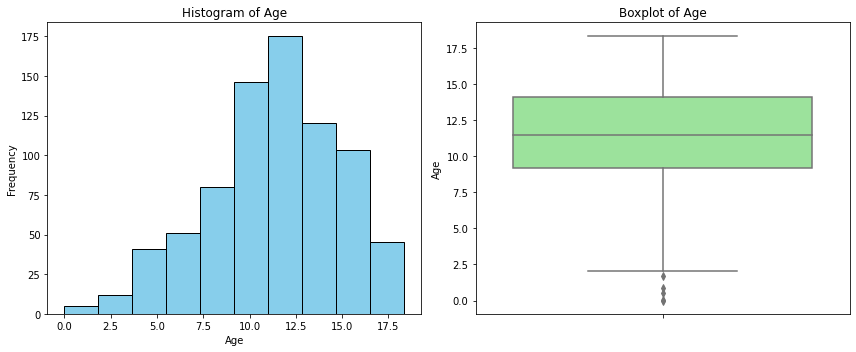

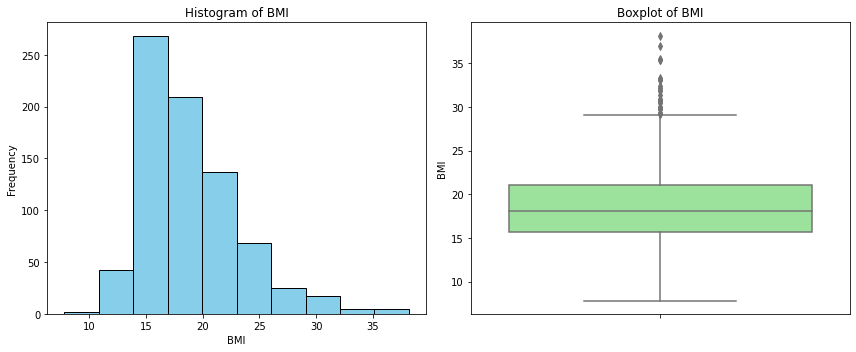

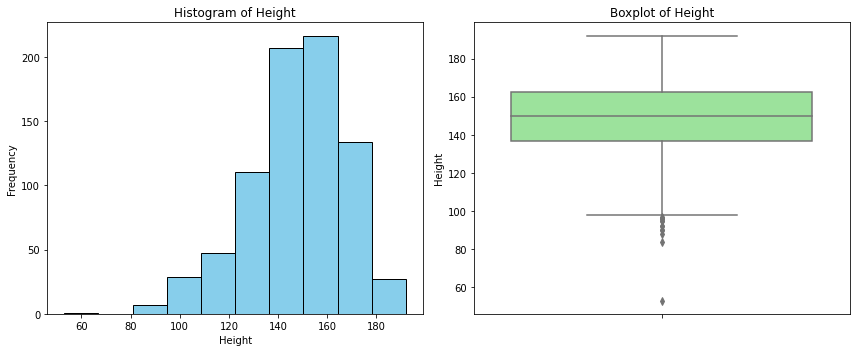

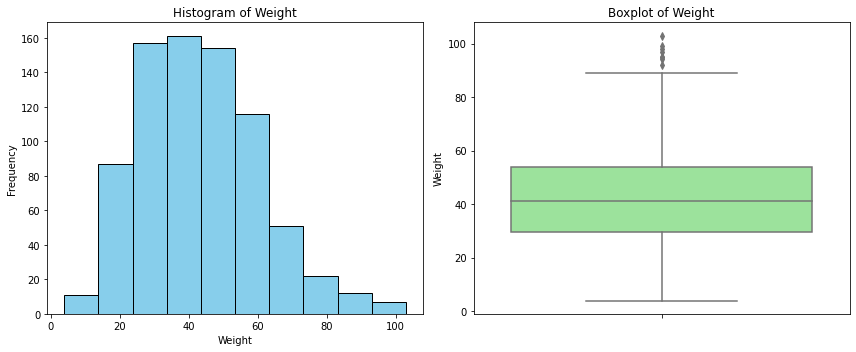

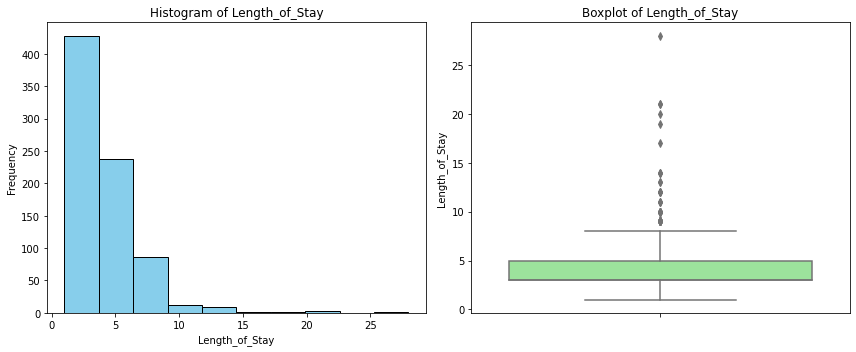

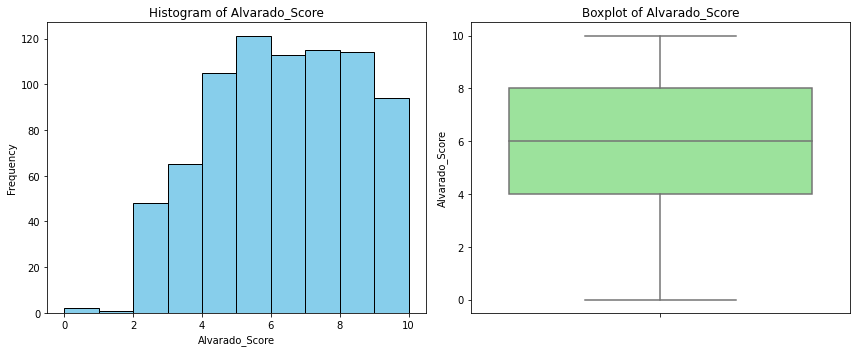

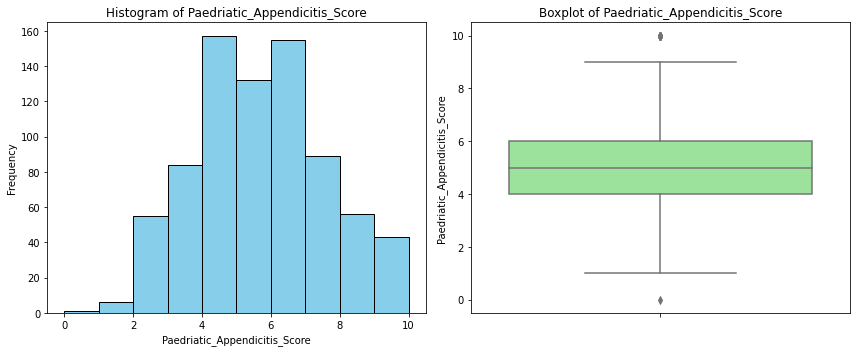

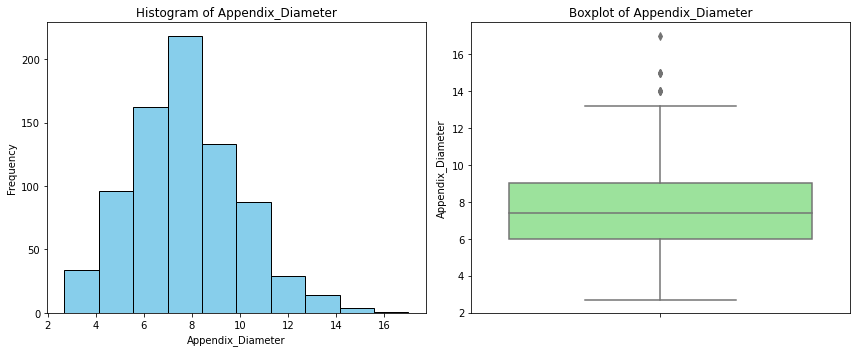

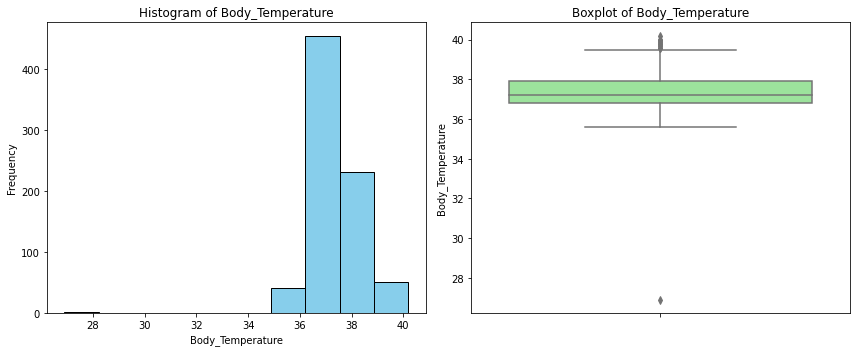

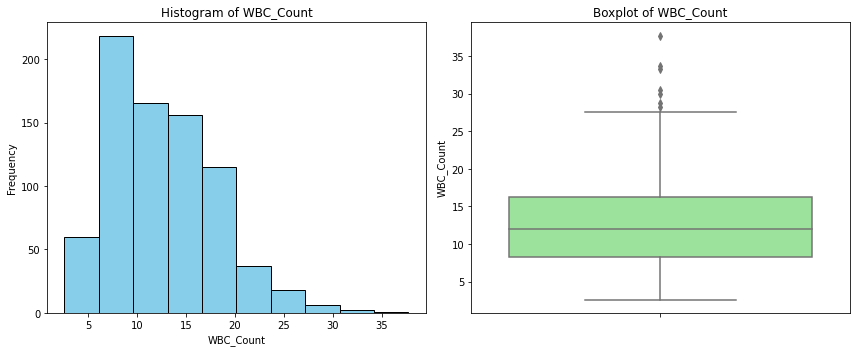

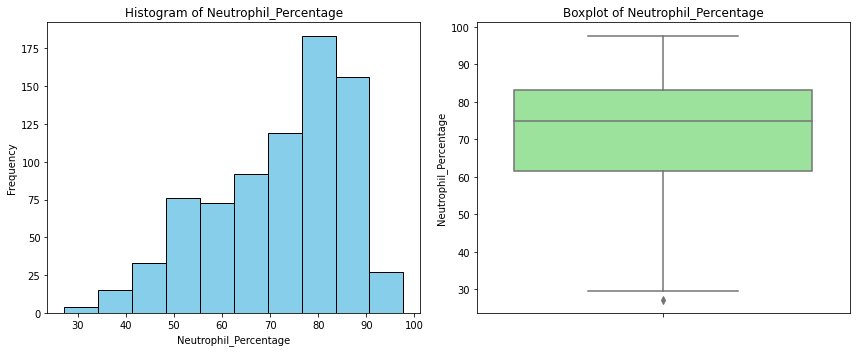

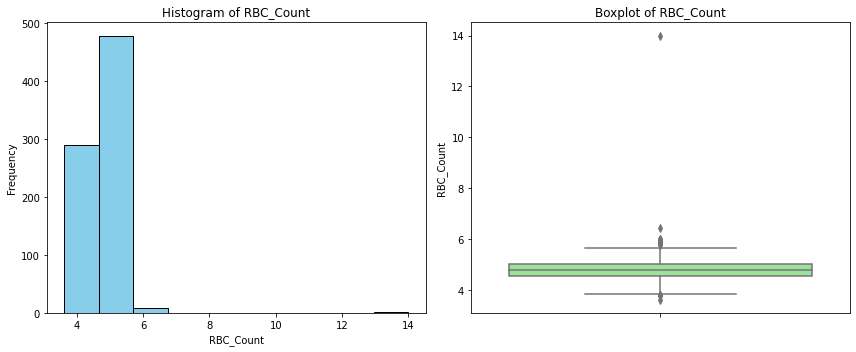

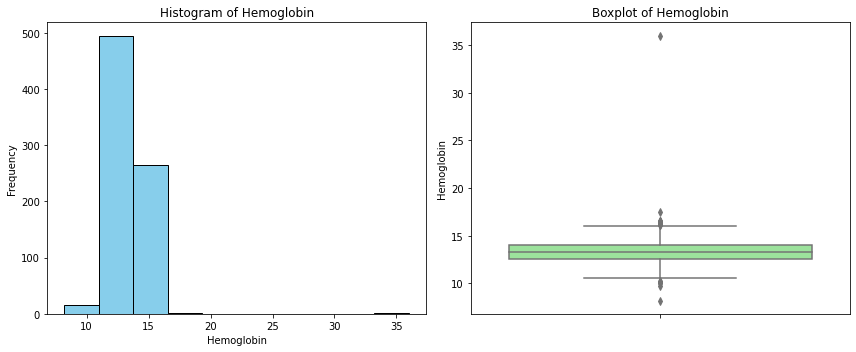

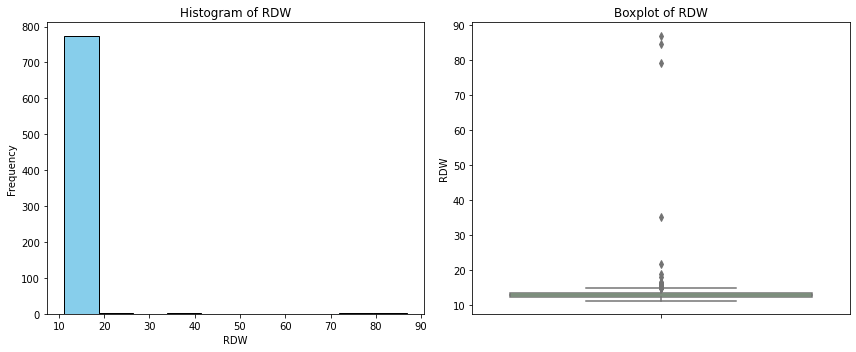

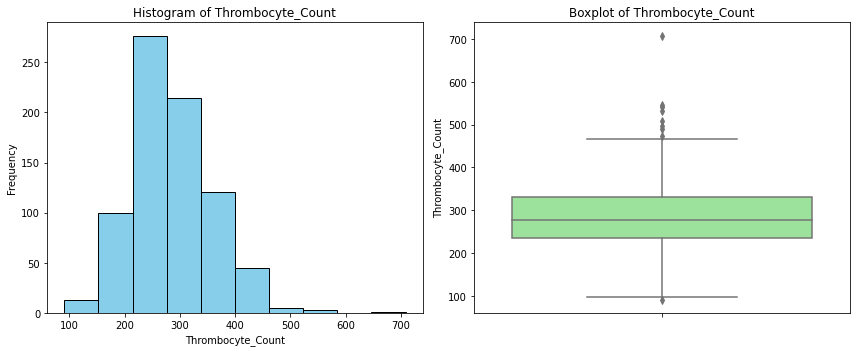

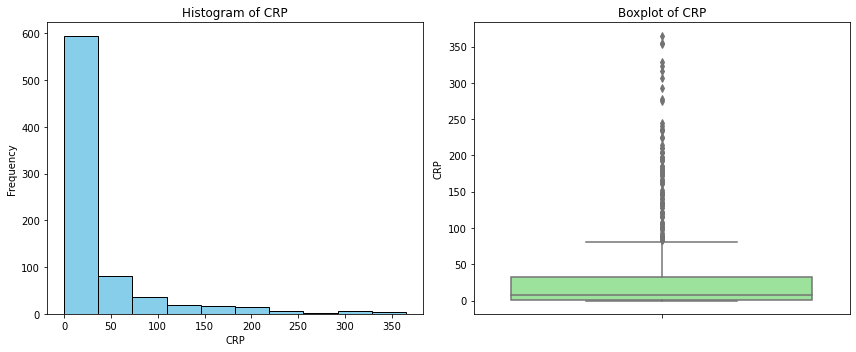

In [31]:
# Plot histograms and boxplots
for col in numeric_df.columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=10,color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

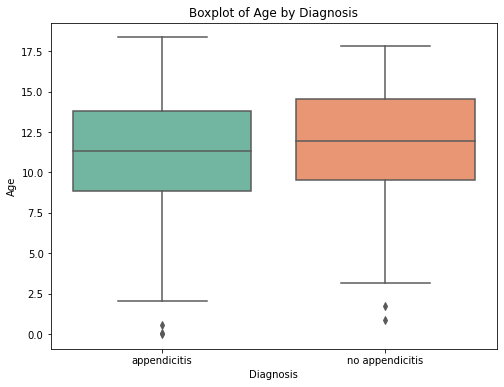

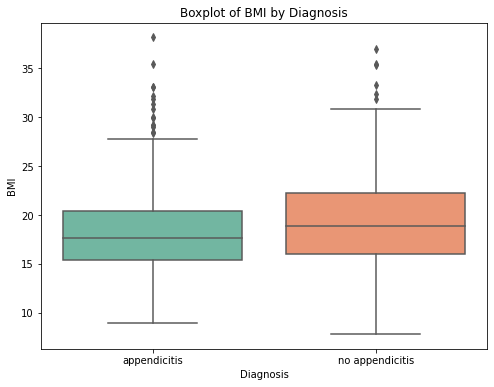

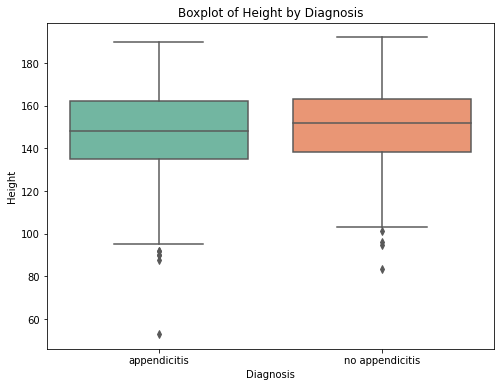

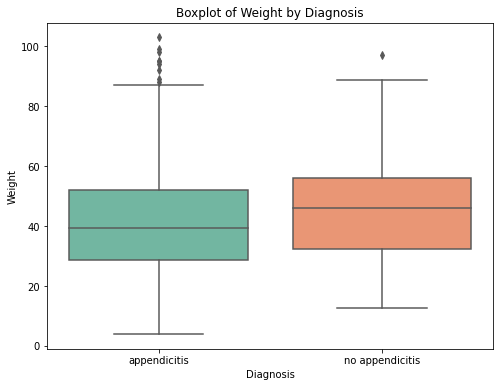

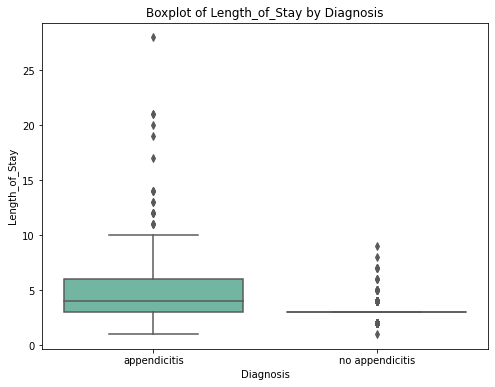

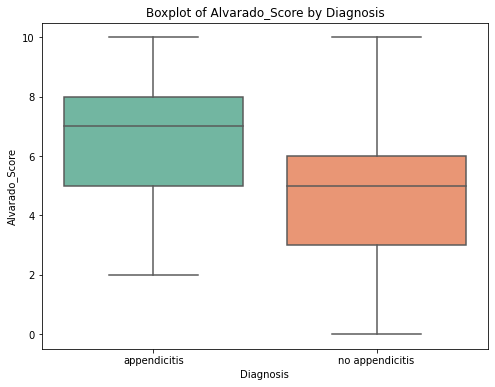

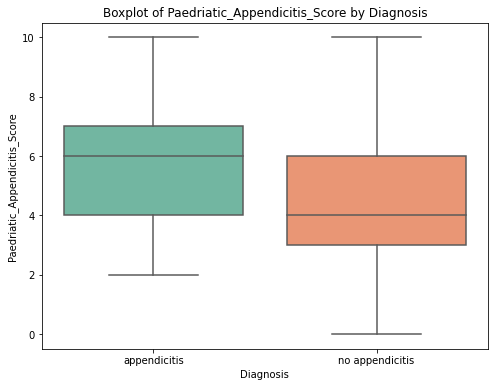

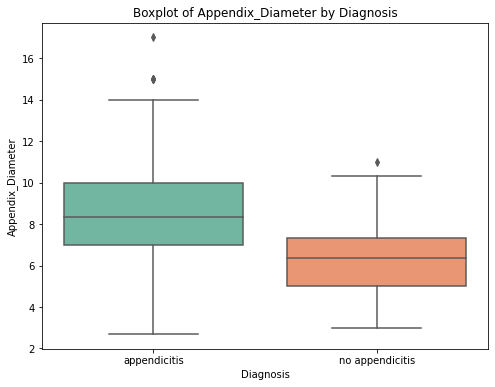

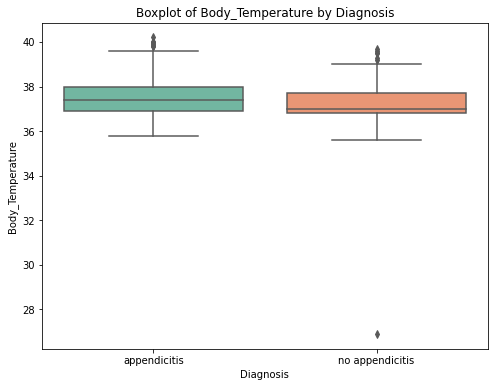

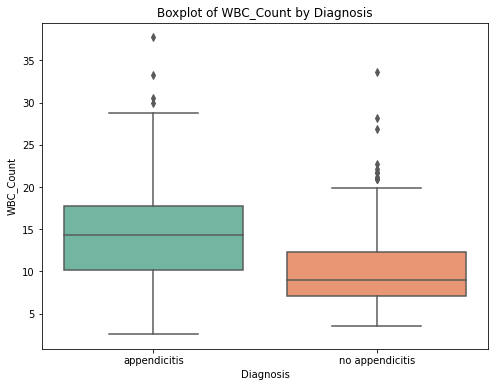

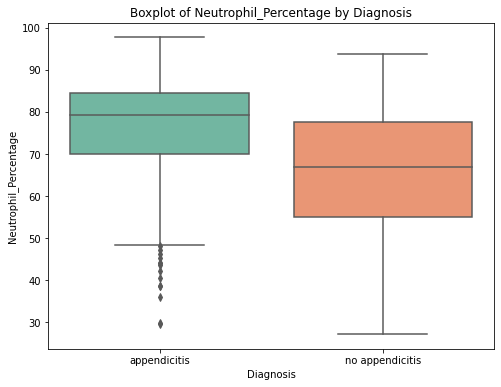

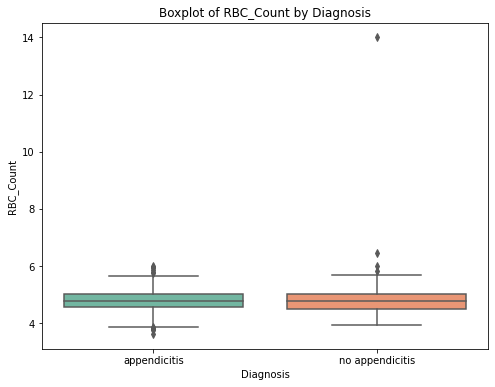

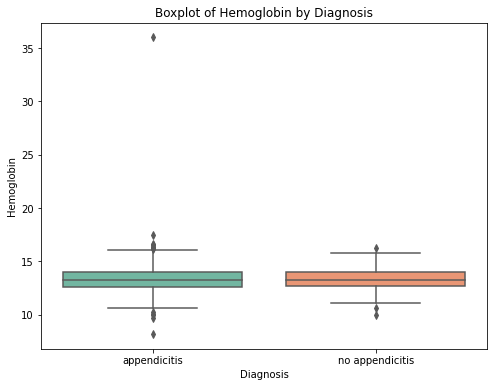

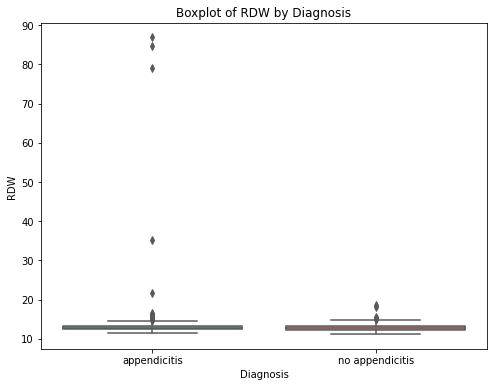

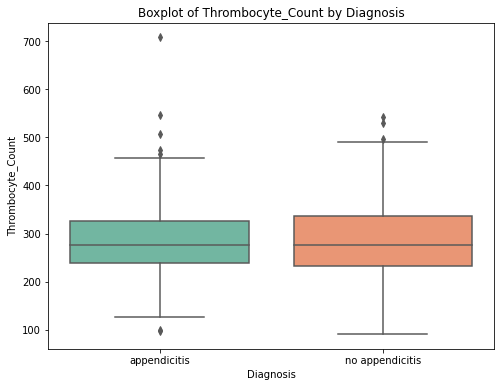

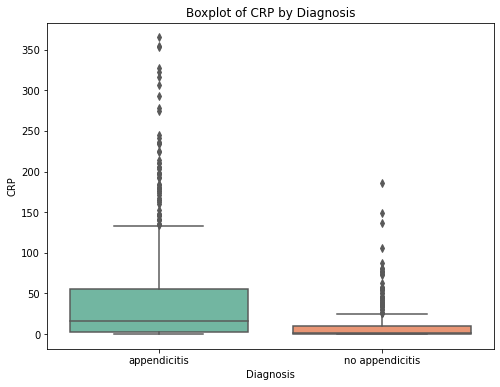

In [32]:
categorical_column='Diagnosis'
for col in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=categorical_column, y=col, palette='Set2')
    plt.title(f'Boxplot of {col} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.show()

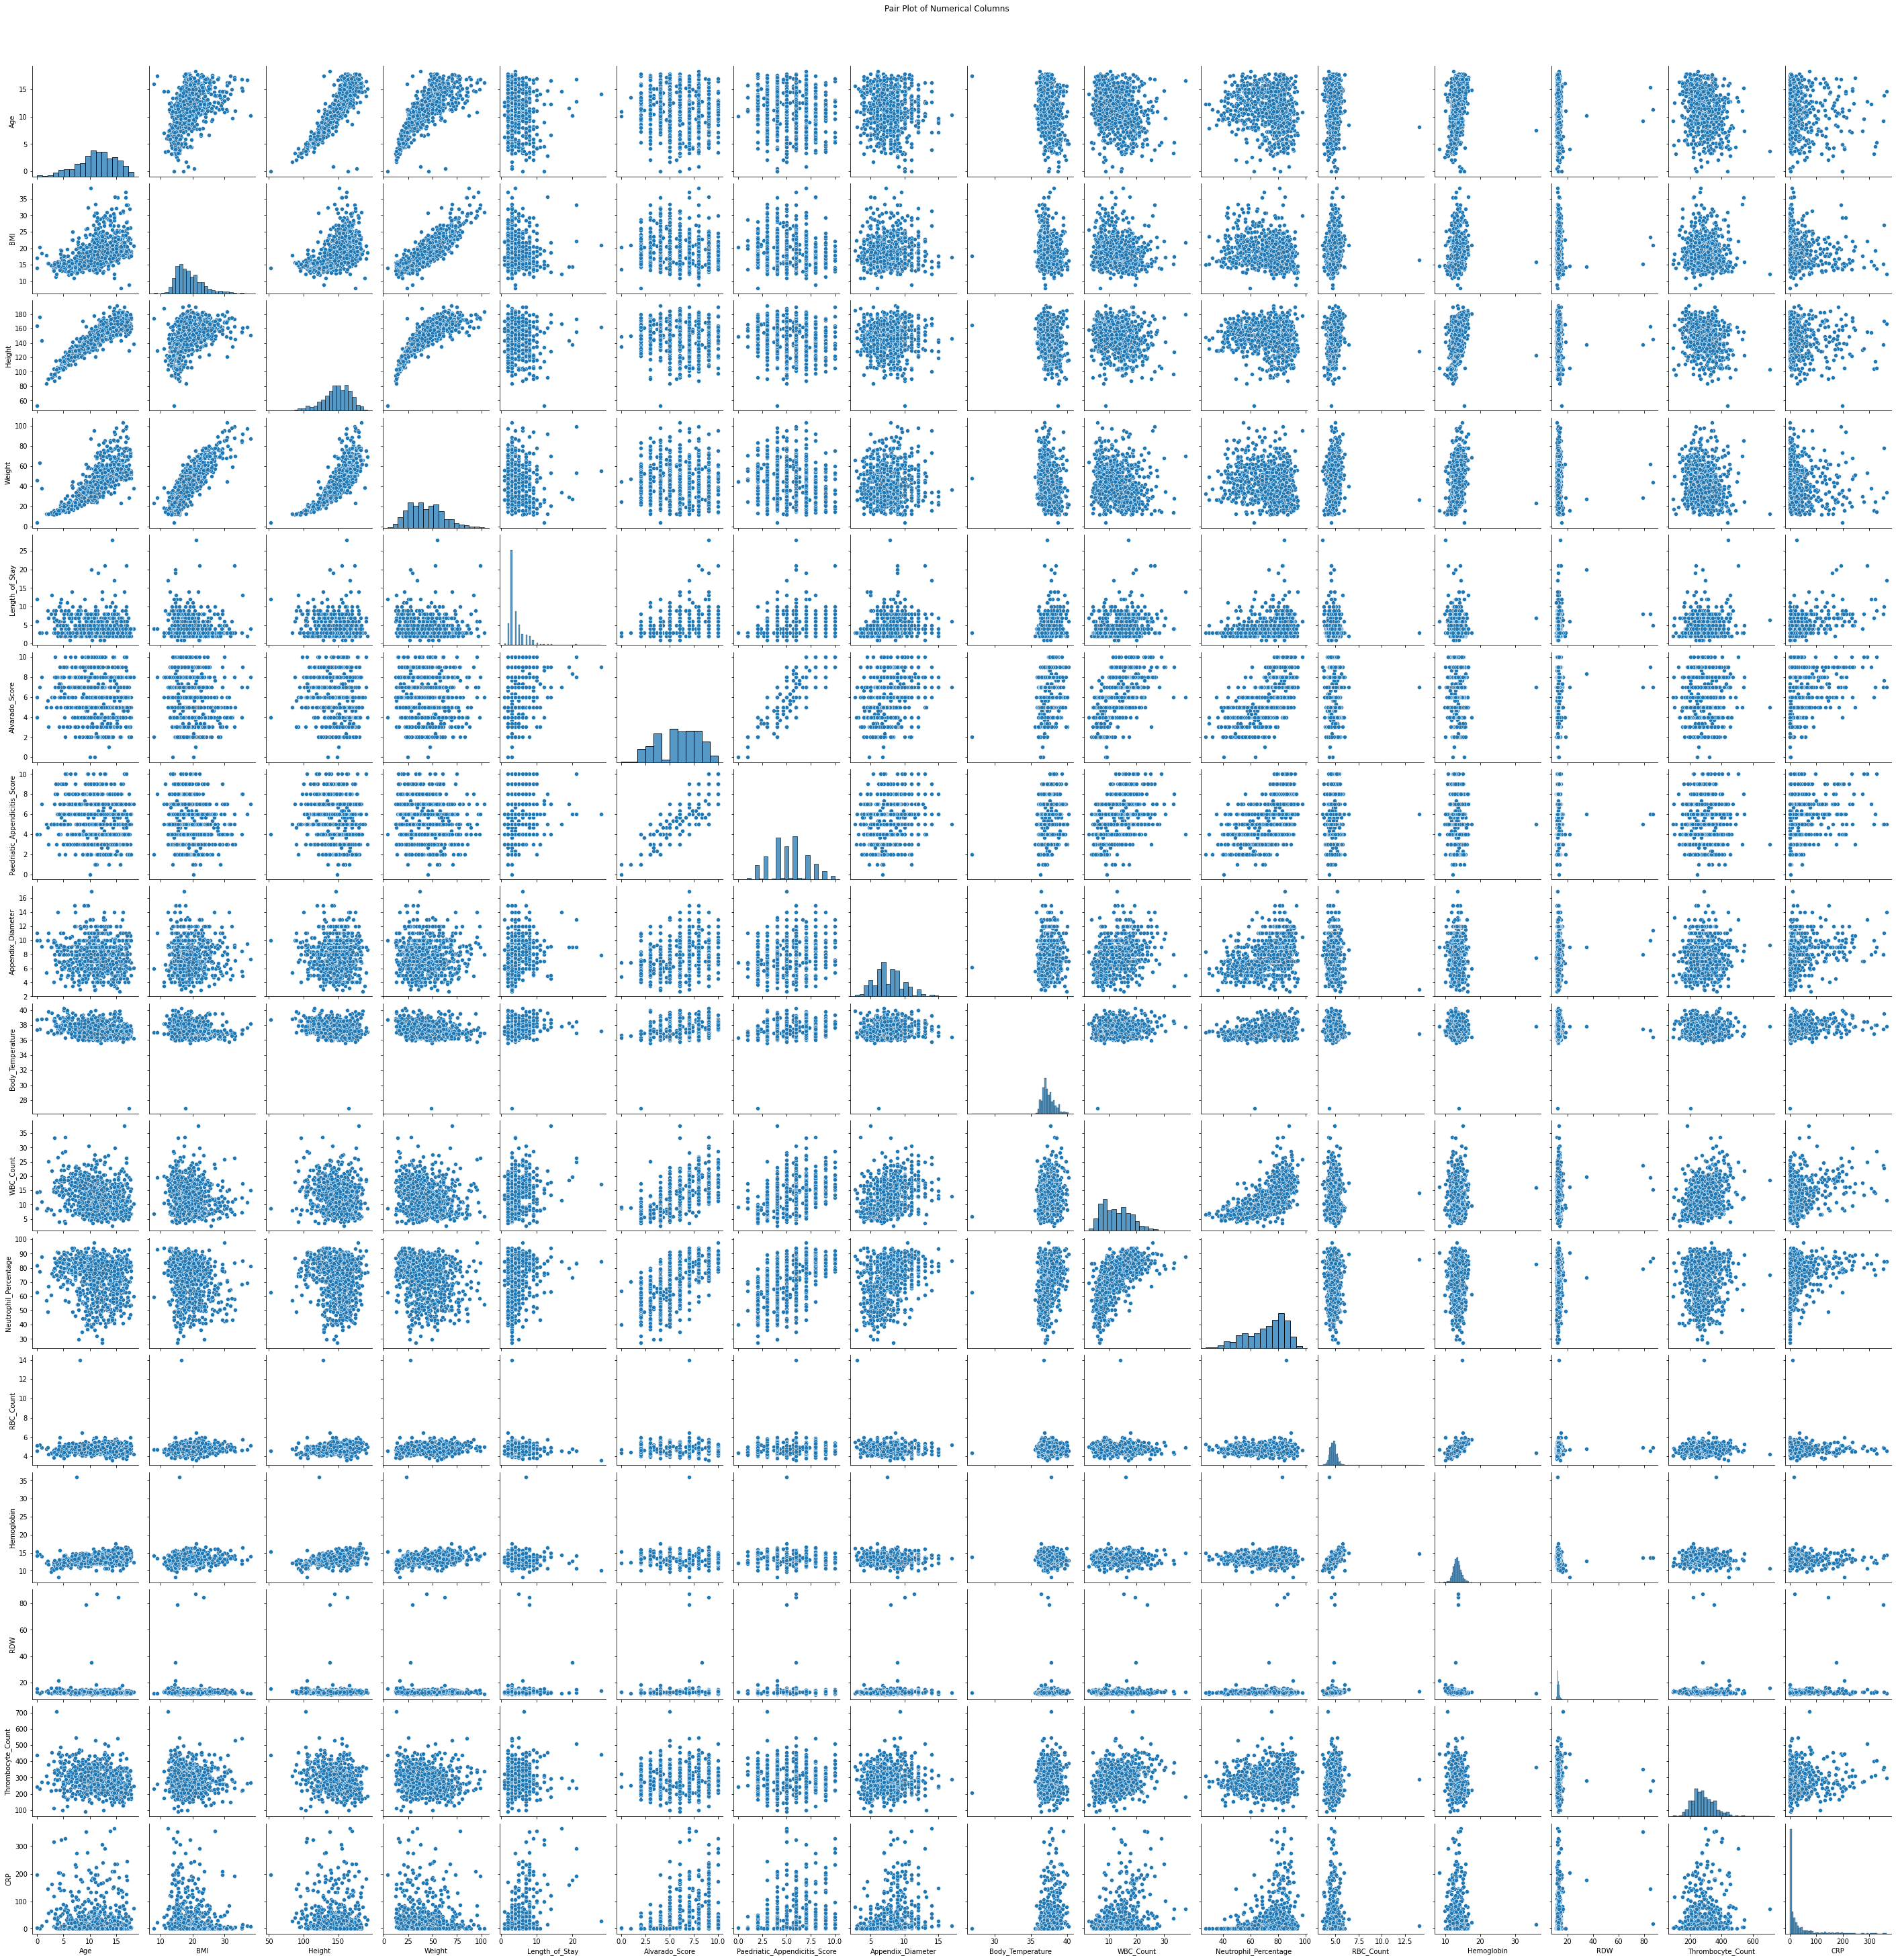

In [33]:
# Pair Plot
sns.pairplot(df[numeric_df.columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

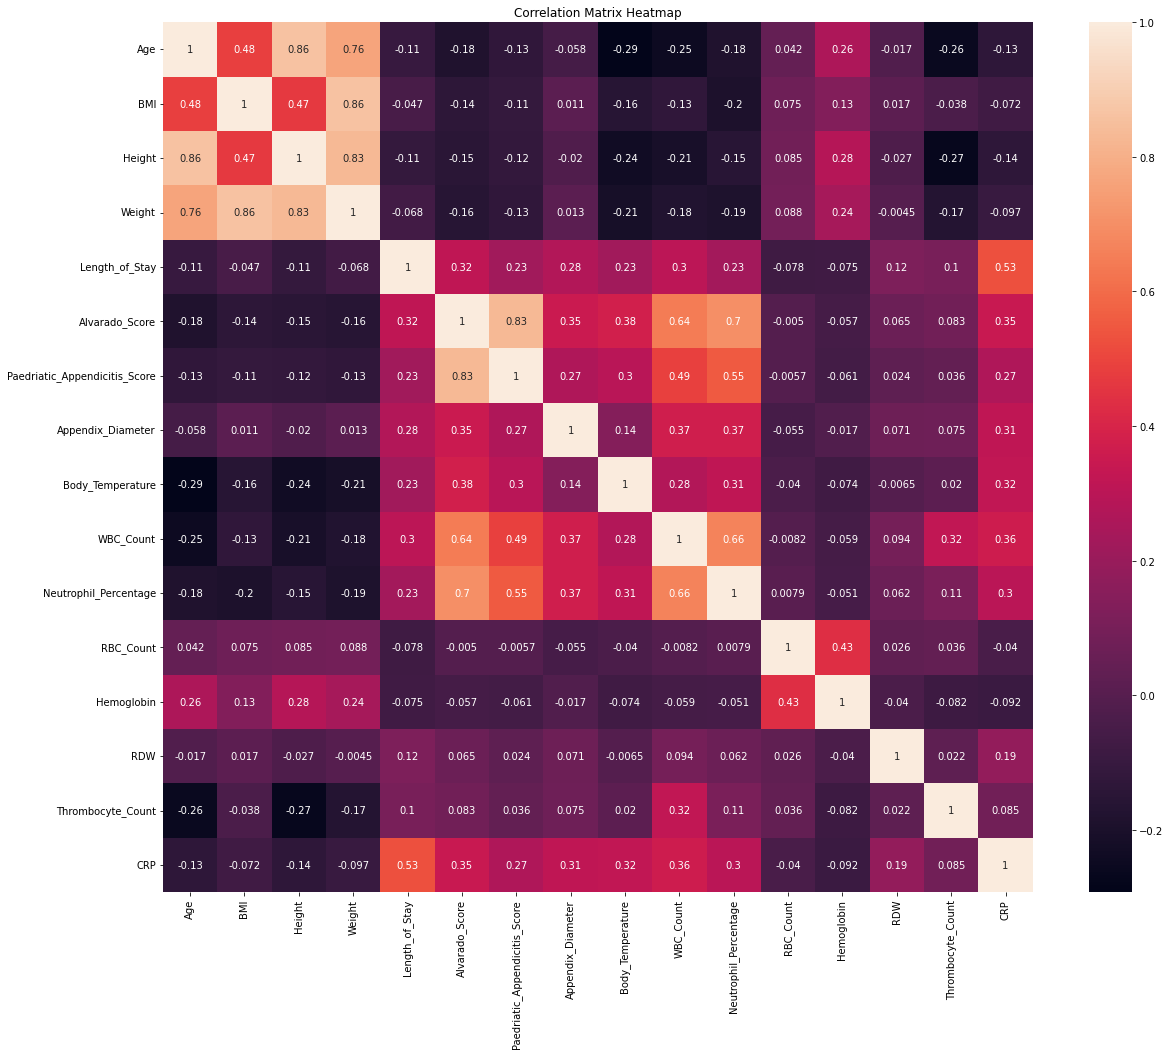

In [34]:
# Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = df[numeric_df.columns].corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

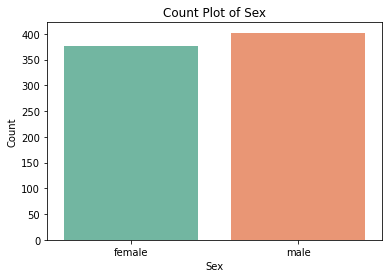

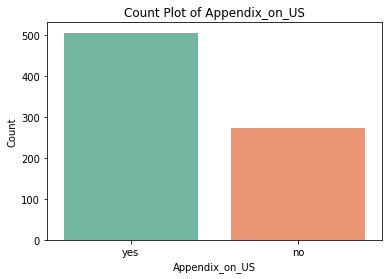

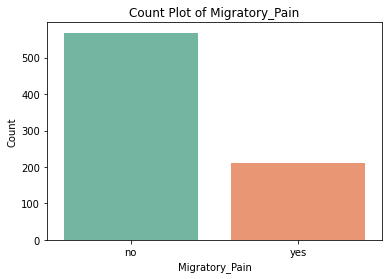

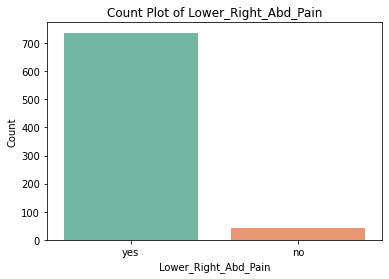

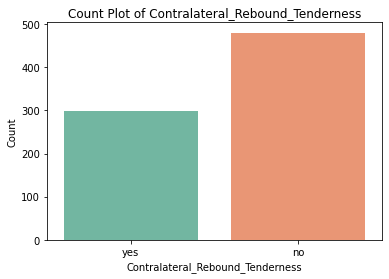

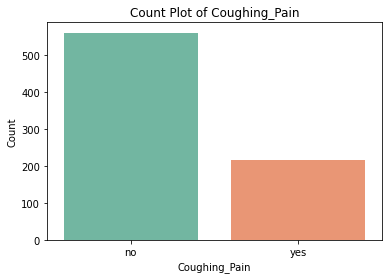

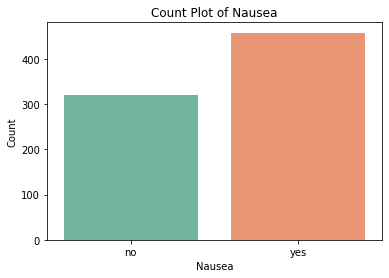

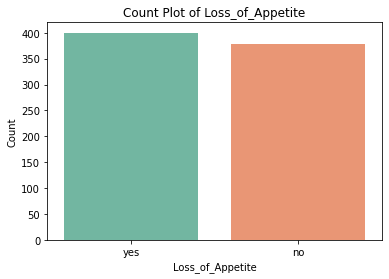

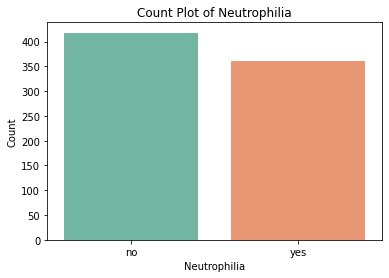

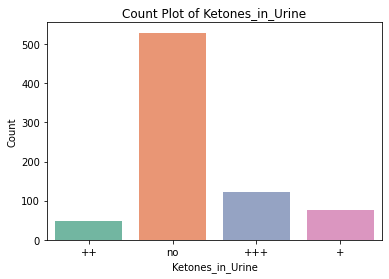

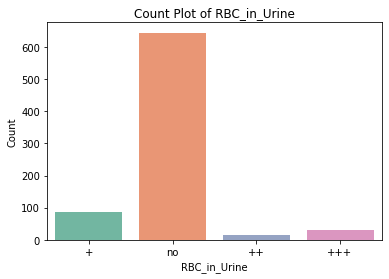

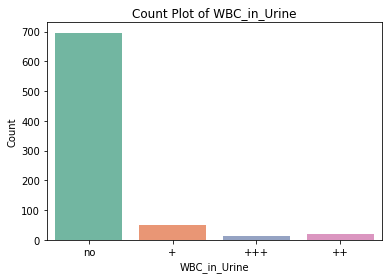

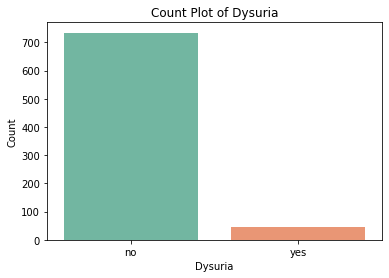

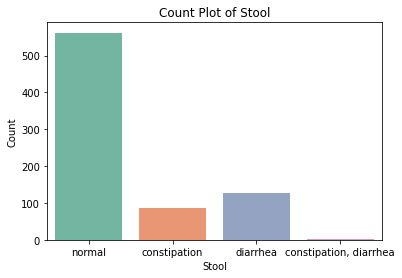

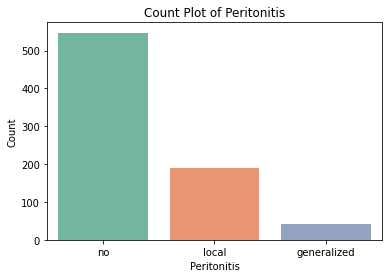

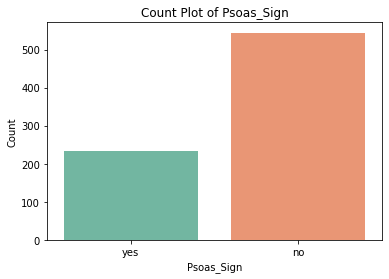

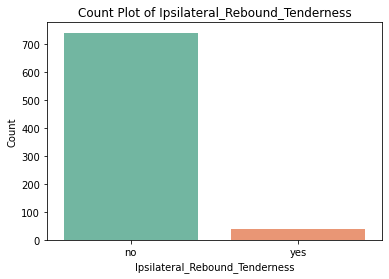

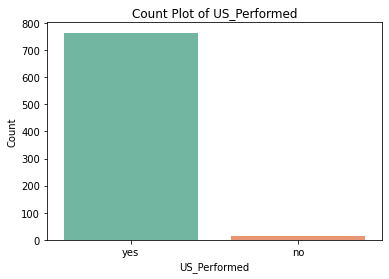

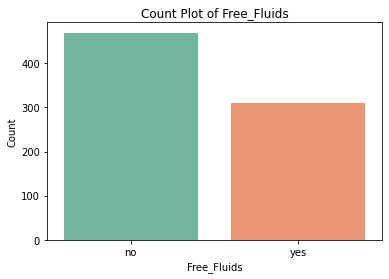

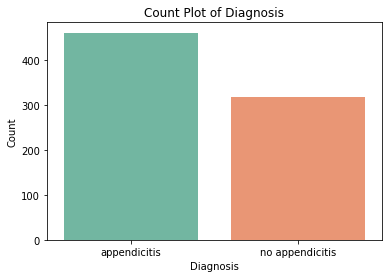

In [35]:
for col in object_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

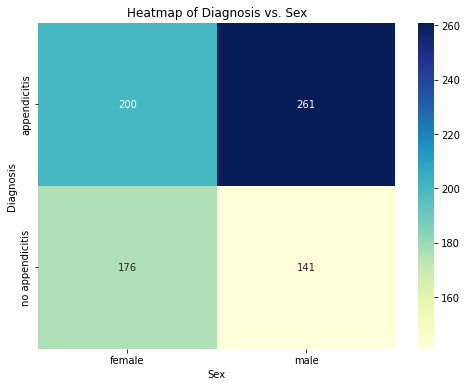

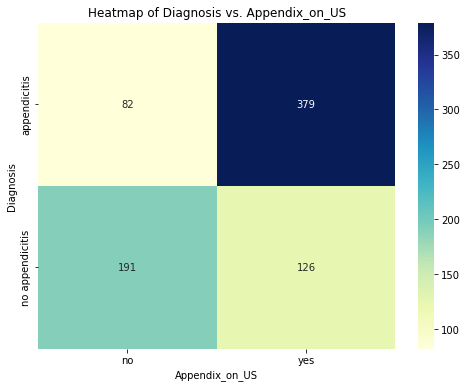

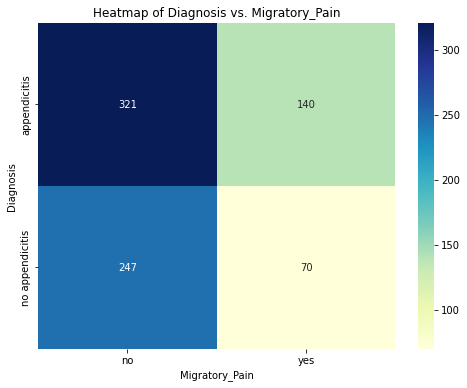

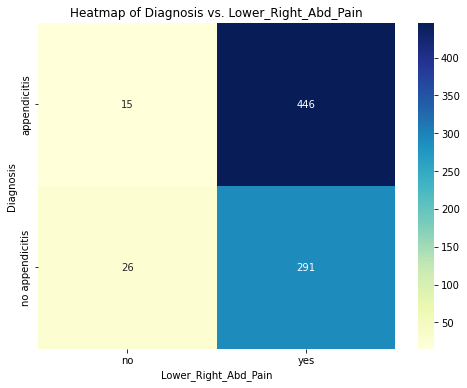

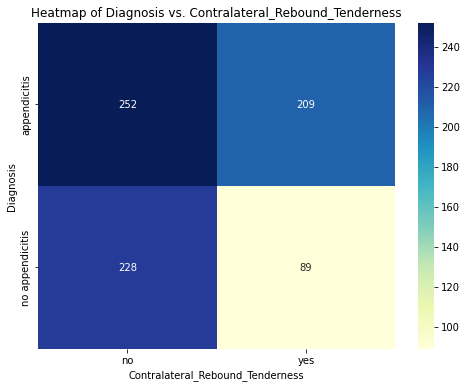

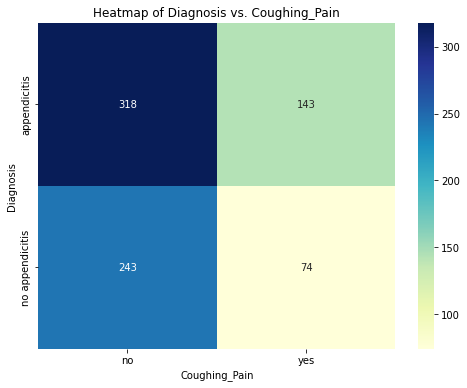

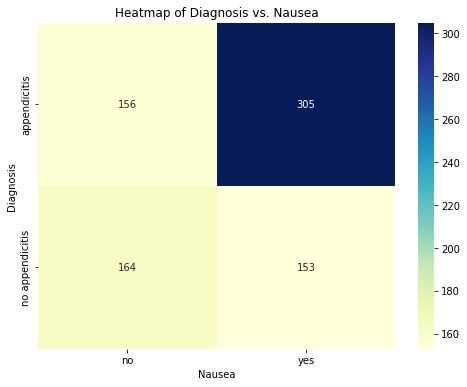

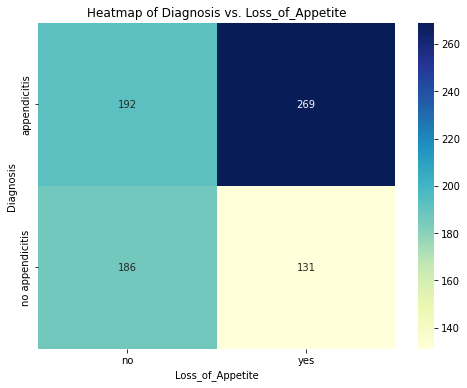

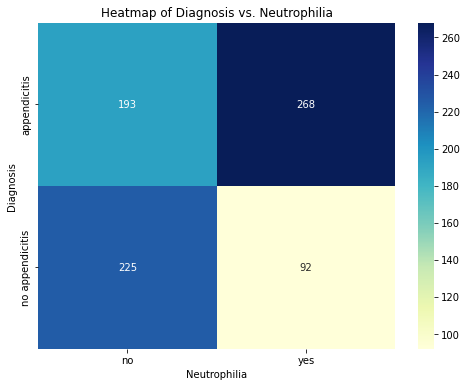

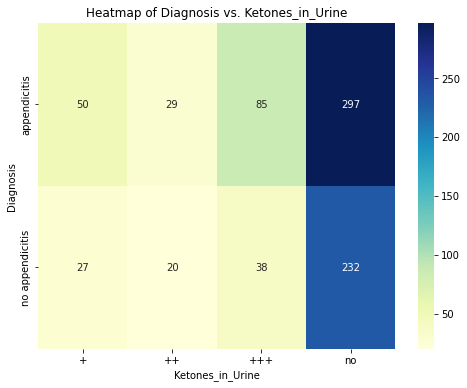

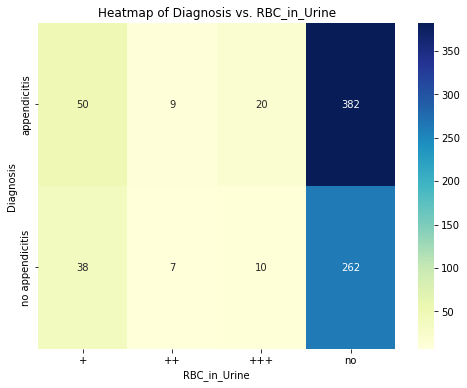

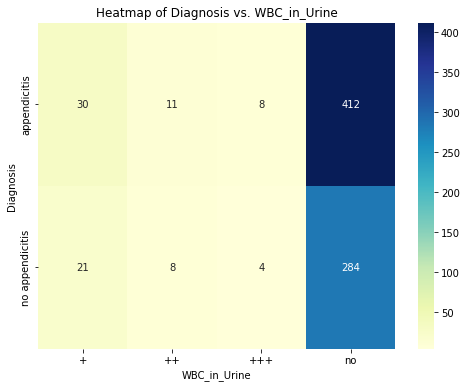

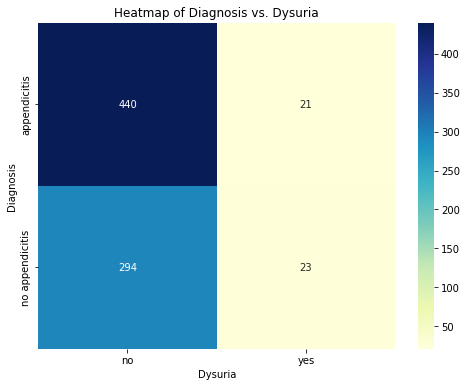

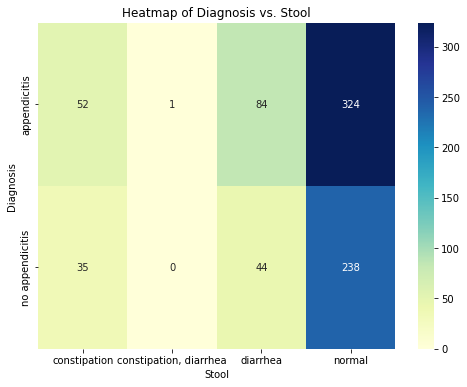

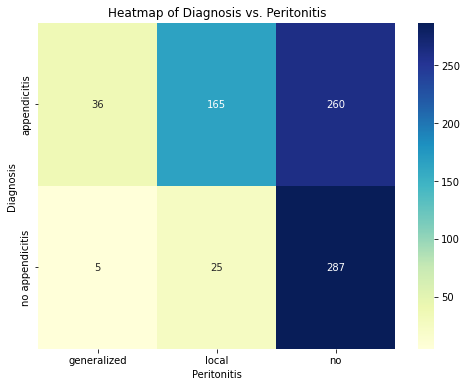

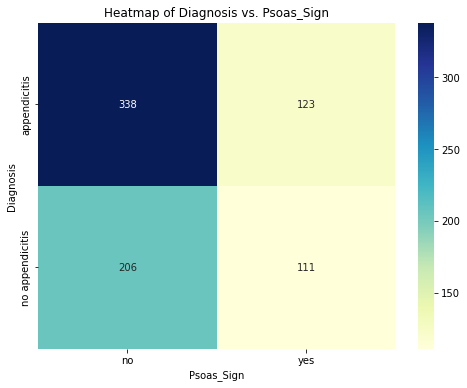

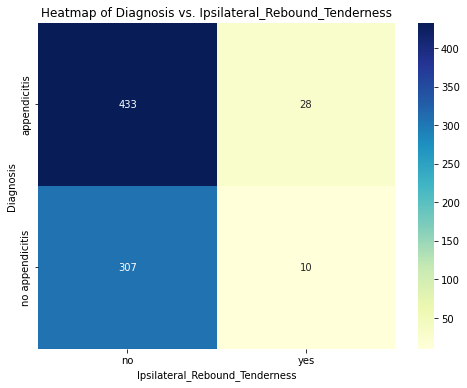

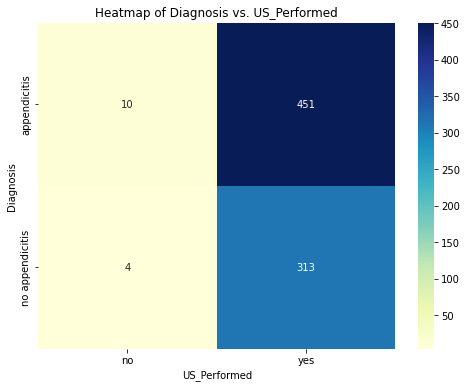

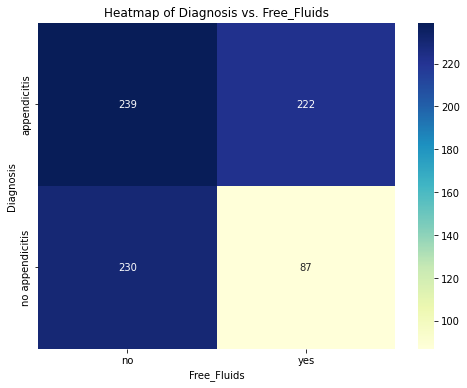

In [36]:
# Fixed categorical column
fixed_column = 'Diagnosis'

# List of varying columns (excluding the fixed column)
varying_columns = [col for col in object_df.columns if col != fixed_column]

# Generate heatmap for each varying column with the fixed column
for col in varying_columns:
    # Create cross-tabulation
    cross_tab = pd.crosstab(df[fixed_column], df[col])

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='d')
    plt.title(f'Heatmap of {fixed_column} vs. {col}')
    plt.xlabel(col)
    plt.ylabel(fixed_column)
    plt.show()

2-sample T-Test for the categorical Target column & the rest of the numeric columns :

In [37]:
import scipy.stats as stats

In [38]:
fixed_categorical_column = 'Diagnosis'

level_1, level_2 = df[fixed_categorical_column].unique()

for col in numeric_df.columns:
    # Split the numeric column into two groups based on the categorical levels
    group1 = df[df[fixed_categorical_column] == level_1][col]
    group2 = df[df[fixed_categorical_column] == level_2][col]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Output results
    print(f"T-test for {col} by {fixed_categorical_column}:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
    
    # Interpret significance
    if p_value < 0.05:
        print(f"**Significant difference** in {col} between {level_1} and {level_2}.")
    else:
        print(f"No significant difference in {col} between {level_1} and {level_2}.")
    print("-" * 50)

T-test for Age by Diagnosis:
T-statistic: -2.325, P-value: 0.020
**Significant difference** in Age between appendicitis and no appendicitis.
--------------------------------------------------
T-test for BMI by Diagnosis:
T-statistic: -3.765, P-value: 0.000
**Significant difference** in BMI between appendicitis and no appendicitis.
--------------------------------------------------
T-test for Height by Diagnosis:
T-statistic: -1.823, P-value: 0.069
No significant difference in Height between appendicitis and no appendicitis.
--------------------------------------------------
T-test for Weight by Diagnosis:
T-statistic: -2.891, P-value: 0.004
**Significant difference** in Weight between appendicitis and no appendicitis.
--------------------------------------------------
T-test for Length_of_Stay by Diagnosis:
T-statistic: 11.578, P-value: 0.000
**Significant difference** in Length_of_Stay between appendicitis and no appendicitis.
--------------------------------------------------
T-test 

Association Test between the Categorical Target Column & rest of the categorical columns :

In [39]:
# Fixed categorical column
fixed_categorical_column = 'Diagnosis'

# Loop through each categorical column and perform Chi-Square test
for col in df.select_dtypes(include=['object']).columns:
    if col == fixed_categorical_column:
        continue  # Skip the fixed column itself

    # Create a contingency table for the Chi-Square test
    contingency_table = pd.crosstab(df[fixed_categorical_column], df[col])
    
    # Perform Chi-Square test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Output results
    print(f"Chi-Square Test between {fixed_categorical_column} and {col}:")
    print(f"Chi2 Statistic: {chi2_stat:.3f}, P-value: {p_value:.3f}")
    
    # Interpret significance
    if p_value < 0.05:
        print(f"**Significant association** between {fixed_categorical_column} and {col}.")
    else:
        print(f"No significant association between {fixed_categorical_column} and {col}.")
    print("-" * 50)

Chi-Square Test between Diagnosis and Sex:
Chi2 Statistic: 10.599, P-value: 0.001
**Significant association** between Diagnosis and Sex.
--------------------------------------------------
Chi-Square Test between Diagnosis and Appendix_on_US:
Chi2 Statistic: 146.854, P-value: 0.000
**Significant association** between Diagnosis and Appendix_on_US.
--------------------------------------------------
Chi-Square Test between Diagnosis and Migratory_Pain:
Chi2 Statistic: 6.132, P-value: 0.013
**Significant association** between Diagnosis and Migratory_Pain.
--------------------------------------------------
Chi-Square Test between Diagnosis and Lower_Right_Abd_Pain:
Chi2 Statistic: 8.248, P-value: 0.004
**Significant association** between Diagnosis and Lower_Right_Abd_Pain.
--------------------------------------------------
Chi-Square Test between Diagnosis and Contralateral_Rebound_Tenderness:
Chi2 Statistic: 22.956, P-value: 0.000
**Significant association** between Diagnosis and Contralate

#### Defining predictors (X) and response variable (y) :

In [40]:
df['diagnosis']= df['Diagnosis'].map({'appendicitis': 0, 'no appendicitis': 1})
df.head()

Age   BMI  Height  Weight  Length_of_Stay  Alvarado_Score   
0  12.68  16.9   148.0    37.0             3.0             4.0  \
1  14.10  31.9   147.0    69.5             2.0             5.0   
2  14.14  23.3   163.0    62.0             4.0             5.0   
3  16.37  20.6   165.0    56.0             3.0             7.0   
4  11.08  16.9   163.0    45.0             3.0             5.0   

   Paedriatic_Appendicitis_Score  Appendix_Diameter  Body_Temperature   
0                            3.0           7.100000              37.0  \
1                            4.0           4.433333              36.9   
2                            3.0           6.700000              36.6   
3                            6.0           6.400000              36.0   
4                            6.0           7.000000              36.9   

   WBC_Count  Neutrophil_Percentage  RBC_Count  Hemoglobin   RDW   
0        7.7                   68.2       5.27        14.8  12.2  \
1        8.1                   64.8       5.26        15.7  12.7   
2       13.2                   74.8       3.98        11.4  12.2   
3       11.4                   63.0       4.64        13.6  13.2   
4        8.1                   44.0       4.44        12.6  13.6   

   Thrombocyte_Count  CRP     Sex Appendix_on_US Migratory_Pain   
0              254.0  0.0  female            yes             no  \
1              151.0  3.0    male             no            yes   
2              300.0  3.0  female             no             no   
3              258.0  0.0  female             no            yes   
4              311.0  0.0  female            yes             no   

  Lower_Right_Abd_Pain Contralateral_Rebound_Tenderness Coughing_Pain Nausea   
0                  yes                              yes            no     no  \
1                  yes                              yes            no     no   
2                  yes                              yes            no     no   
3                  yes                               no            no    yes   
4                  yes                              yes           yes    yes   

  Loss_of_Appetite Neutrophilia Ketones_in_Urine RBC_in_Urine WBC_in_Urine   
0              yes           no               ++            +           no  \
1              yes           no               no           no           no   
2               no           no               no           no           no   
3              yes           no               no           no           no   
4              yes           no               no           no           no   

  Dysuria         Stool Peritonitis Psoas_Sign Ipsilateral_Rebound_Tenderness   
0      no        normal          no        yes                             no  \
1     yes        normal          no        yes                             no   
2      no  constipation          no        yes                             no   
3     yes        normal          no        yes                             no   
4      no  constipation          no        yes                             no   

  US_Performed Free_Fluids        Diagnosis  diagnosis  
0          yes          no     appendicitis          0  
1          yes          no  no appendicitis          1  
2          yes          no  no appendicitis          1  
3          yes          no  no appendicitis          1  
4          yes          no     appendicitis          0

In [41]:
X = df.drop(['Diagnosis','diagnosis'],axis=1)
y=df.diagnosis

In [42]:
# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

Age   BMI  Height  Weight  Length_of_Stay  Alvarado_Score   
0  12.68  16.9   148.0    37.0             3.0             4.0  \
1  14.10  31.9   147.0    69.5             2.0             5.0   
2  14.14  23.3   163.0    62.0             4.0             5.0   
3  16.37  20.6   165.0    56.0             3.0             7.0   
4  11.08  16.9   163.0    45.0             3.0             5.0   

   Paedriatic_Appendicitis_Score  Appendix_Diameter  Body_Temperature   
0                            3.0           7.100000              37.0  \
1                            4.0           4.433333              36.9   
2                            3.0           6.700000              36.6   
3                            6.0           6.400000              36.0   
4                            6.0           7.000000              36.9   

   WBC_Count  Neutrophil_Percentage  RBC_Count  Hemoglobin   RDW   
0        7.7                   68.2       5.27        14.8  12.2  \
1        8.1                   64.8       5.26        15.7  12.7   
2       13.2                   74.8       3.98        11.4  12.2   
3       11.4                   63.0       4.64        13.6  13.2   
4        8.1                   44.0       4.44        12.6  13.6   

   Thrombocyte_Count  CRP  Sex_male  Appendix_on_US_yes  Migratory_Pain_yes   
0              254.0  0.0     False                True               False  \
1              151.0  3.0      True               False                True   
2              300.0  3.0     False               False               False   
3              258.0  0.0     False               False                True   
4              311.0  0.0     False                True               False   

   Lower_Right_Abd_Pain_yes  Contralateral_Rebound_Tenderness_yes   
0                      True                                  True  \
1                      True                                  True   
2                      True                                  True   
3                      True                                 False   
4                      True                                  True   

   Coughing_Pain_yes  Nausea_yes  Loss_of_Appetite_yes  Neutrophilia_yes   
0              False       False                  True             False  \
1              False       False                  True             False   
2              False       False                 False             False   
3              False        True                  True             False   
4               True        True                  True             False   

   Ketones_in_Urine_++  Ketones_in_Urine_+++  Ketones_in_Urine_no   
0                 True                 False                False  \
1                False                 False                 True   
2                False                 False                 True   
3                False                 False                 True   
4                False                 False                 True   

   RBC_in_Urine_++  RBC_in_Urine_+++  RBC_in_Urine_no  WBC_in_Urine_++   
0            False             False            False            False  \
1            False             False             True            False   
2            False             False             True            False   
3            False             False             True            False   
4            False             False             True            False   

   WBC_in_Urine_+++  WBC_in_Urine_no  Dysuria_yes   
0             False             True        False  \
1             False             True         True   
2             False             True        False   
3             False             True         True   
4             False             True        False   

   Stool_constipation, diarrhea  Stool_diarrhea  Stool_normal   
0                         False           False          True  \
1                         False           False          True   
2                         False        

#### Train & Test Sets Splitting :

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Splitting the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2, random_state=42)

In [45]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (622, 44)
Testing set size: (156, 44)


#### Logistic Regression :

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [47]:
log=LogisticRegression()
logmdl=log.fit(X_train,y_train)
logmdl.score(X_train,y_train)

0.8890675241157556

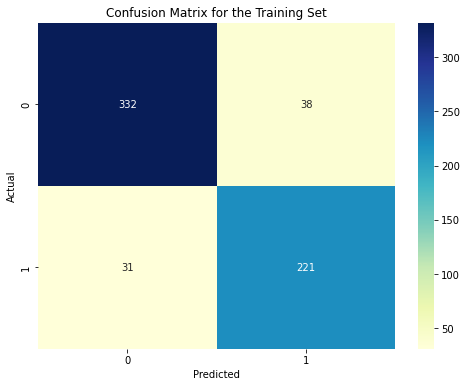

In [48]:
# Make predictions
y_pred = log.predict(X_train)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix for the Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
# Let's look for the Train set Perfoemance :
print("Train Set :")
print(classification_report(y_train,logmdl.predict(X_train)))

Train Set :
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       370
           1       0.85      0.88      0.86       252

    accuracy                           0.89       622
   macro avg       0.88      0.89      0.89       622
weighted avg       0.89      0.89      0.89       622



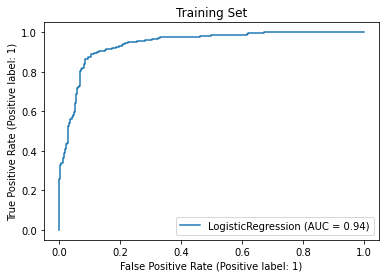

In [50]:
RocCurveDisplay.from_estimator(log, X_train, y_train)
plt.title("Training Set")
plt.show()

In [51]:
# Let's look for the Test set Perfoemance :
print('Test Set :')
print(classification_report(y_test,logmdl.predict(X_test)))

Test Set :
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        91
           1       0.84      0.80      0.82        65

    accuracy                           0.85       156
   macro avg       0.85      0.85      0.85       156
weighted avg       0.85      0.85      0.85       156



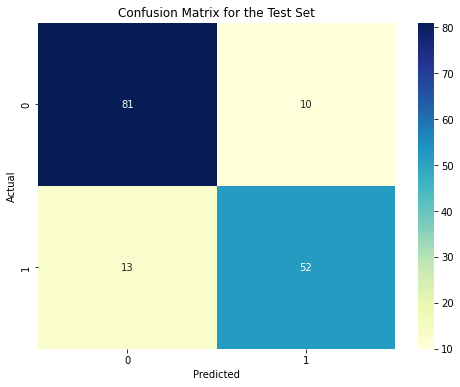

In [52]:
# Make predictions
y_pred = log.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix for the Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

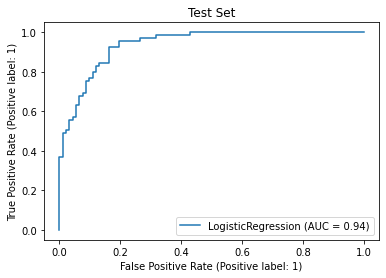

In [53]:
RocCurveDisplay.from_estimator(log, X_test, y_test)
plt.title("Test Set")
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
# Apply cross-validation using AUC score as the metric
cv_scores = cross_val_score(log, X_train, y_train, cv=5, scoring='roc_auc')

In [55]:
# Print the AUC scores for each fold
print("AUC scores for each fold: ", cv_scores)

AUC scores for each fold:  [0.92050874 0.9599894  0.91567568 0.90540541 0.93297297]


In [56]:
# Print the mean AUC score across all folds
print(f"Mean AUC score: {cv_scores.mean()}")

Mean AUC score: 0.9269104398516163


In [57]:
from sklearn.feature_selection import RFECV
rfe_acc=RFECV(estimator=log,cv=4,n_jobs=-1)
rfe_roc=RFECV(estimator=log,cv=4,scoring='roc_auc',n_jobs=-1)
rfe_prec=RFECV(estimator=log,cv=4,scoring='precision_macro',n_jobs=-1)
rfe_recall=RFECV(estimator=log,cv=4,scoring='recall_macro',n_jobs=-1)

In [58]:
%%time
rfe_acc.fit(X_train,y_train)

Wall time: 2.89 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1)

In [59]:
%%time
rfe_roc.fit(X_train,y_train)

Wall time: 1.21 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc')

In [60]:
%%time
rfe_prec.fit(X_train,y_train)

Wall time: 1.33 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
      scoring='precision_macro')

In [61]:
%%time
rfe_recall.fit(X_train,y_train)

Wall time: 1.47 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1, scoring='recall_macro')

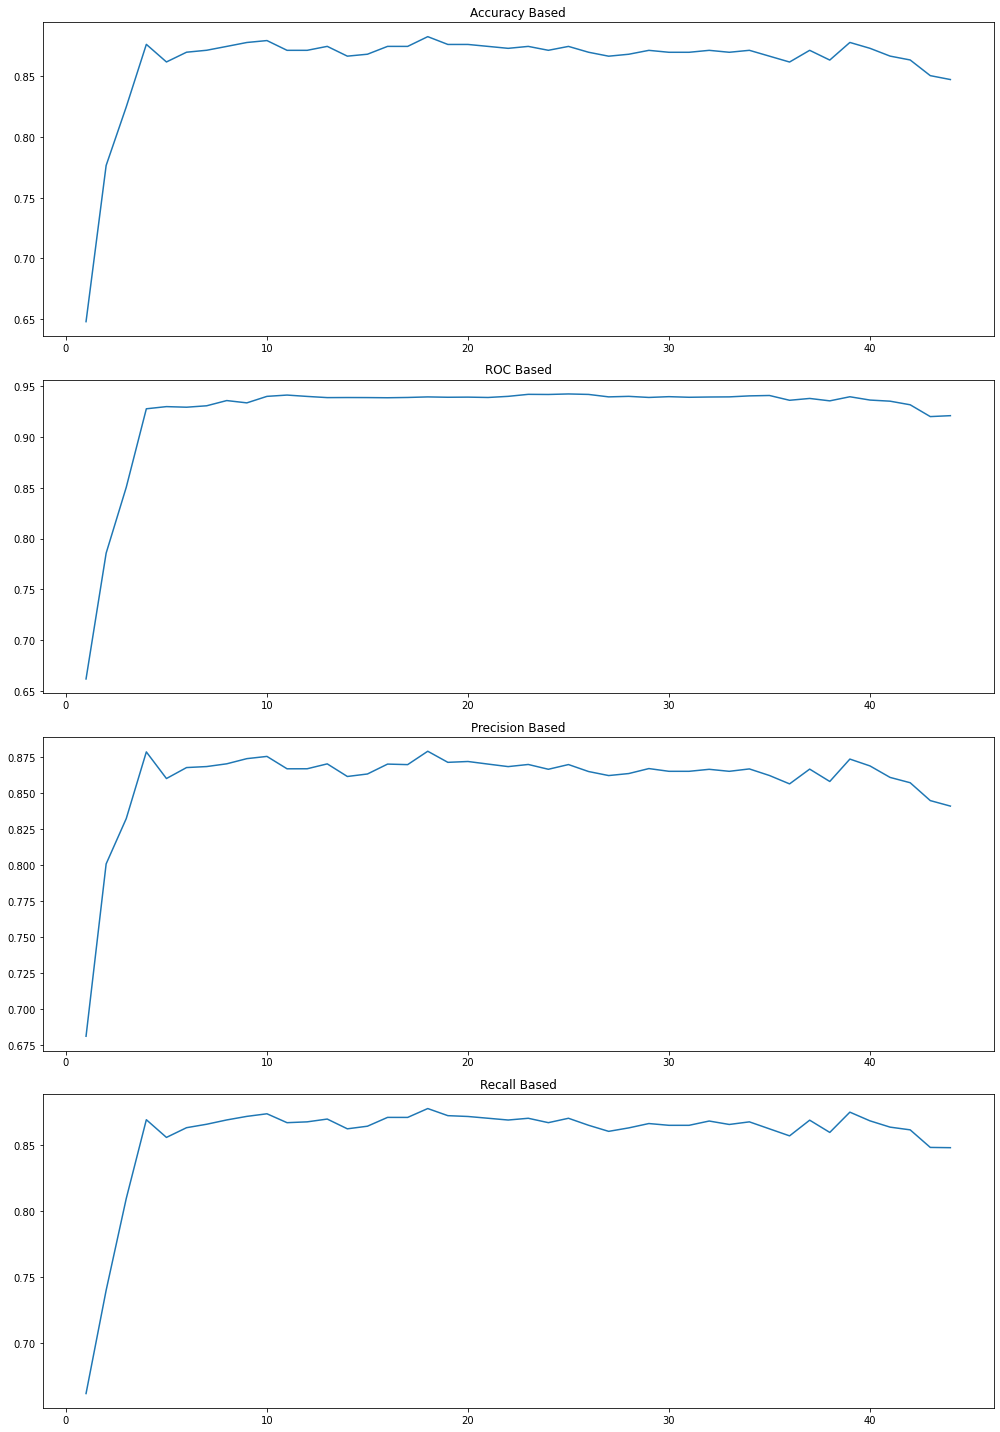

In [62]:
plt.figure(figsize=(14, 20))

# Plot for Accuracy-based
plt.subplot(4, 1, 1)
plt.plot(range(1, X_train.shape[1] + 1), rfe_acc.cv_results_['mean_test_score'])
plt.title("Accuracy Based")

# Plot for ROC AUC-based
plt.subplot(4, 1, 2)
plt.plot(range(1, X_train.shape[1] + 1), rfe_roc.cv_results_['mean_test_score'])
plt.title("ROC Based")

# Plot for Precision-based
plt.subplot(4, 1, 3)
plt.plot(range(1, X_train.shape[1] + 1), rfe_prec.cv_results_['mean_test_score'])
plt.title("Precision Based")

# Plot for Recall-based
plt.subplot(4, 1, 4)
plt.plot(range(1, X_train.shape[1] + 1), rfe_recall.cv_results_['mean_test_score'])
plt.title("Recall Based")

plt.tight_layout()
plt.show()

In [63]:
print(f"Number of features selected by RFECV (accuracy-based): {rfe_acc.n_features_}")
print(f"Number of features selected by RFECV (ROC AUC-based): {rfe_roc.n_features_}")
print(f"Number of features selected by RFECV (precision-based): {rfe_prec.n_features_}")
print(f"Number of features selected by RFECV (recall-based): {rfe_recall.n_features_}")

Number of features selected by RFECV (accuracy-based): 18
Number of features selected by RFECV (ROC AUC-based): 25
Number of features selected by RFECV (precision-based): 18
Number of features selected by RFECV (recall-based): 18


In [64]:
# Assuming X_train is your feature DataFrame for training
selected_acc = set(X_train.columns[rfe_acc.support_])
selected_roc = set(X_train.columns[rfe_roc.support_])
selected_prec = set(X_train.columns[rfe_prec.support_])
selected_recall = set(X_train.columns[rfe_recall.support_])

# Find common selected features
common_features = list(selected_acc & selected_roc & selected_prec & selected_recall)

# Print the common selected features
print(f"Common selected features: {common_features}")

Common selected features: ['Stool_normal', 'Ketones_in_Urine_++', 'WBC_in_Urine_+++', 'Length_of_Stay', 'Nausea_yes', 'Dysuria_yes', 'Stool_diarrhea', 'US_Performed_yes', 'Appendix_Diameter', 'Appendix_on_US_yes', 'Lower_Right_Abd_Pain_yes', 'Migratory_Pain_yes', 'WBC_in_Urine_no', 'Psoas_Sign_yes', 'RBC_in_Urine_+++', 'Peritonitis_no', 'Coughing_Pain_yes', 'Loss_of_Appetite_yes']


In [65]:
len(common_features)

18

In [66]:
X_train =X_train[common_features]
X_test = X_test[common_features]
print(X_train.shape)
print(X_test.shape)

(622, 18)
(156, 18)


In [67]:
logmdl=log.fit(X_train,y_train)
logmdl.score(X_train,y_train)

0.9067524115755627

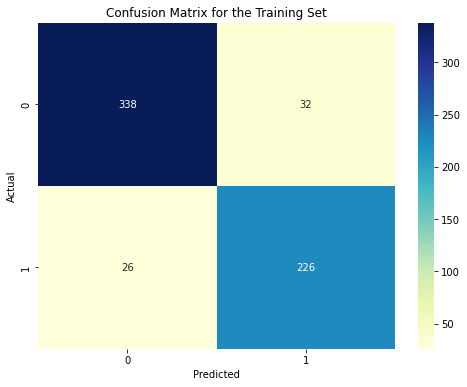

In [68]:
# Make predictions
y_pred = log.predict(X_train)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix for the Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [69]:
# Let's look for the Train set Perfoemance :
print("Train Set :")
print(classification_report(y_train,logmdl.predict(X_train)))

Train Set :
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       370
           1       0.88      0.90      0.89       252

    accuracy                           0.91       622
   macro avg       0.90      0.91      0.90       622
weighted avg       0.91      0.91      0.91       622



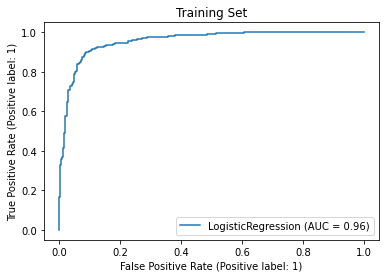

In [70]:
RocCurveDisplay.from_estimator(log, X_train, y_train)
plt.title("Training Set")
plt.show()

In [71]:
# Let's look for the Test set Perfoemance :
print('Test Set :')
print(classification_report(y_test,logmdl.predict(X_test)))

Test Set :
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        91
           1       0.82      0.83      0.82        65

    accuracy                           0.85       156
   macro avg       0.85      0.85      0.85       156
weighted avg       0.85      0.85      0.85       156



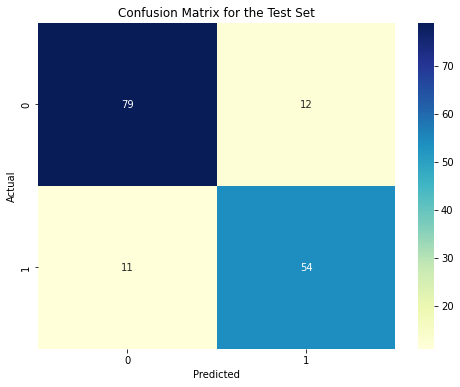

In [72]:
# Make predictions
y_pred = log.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix for the Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

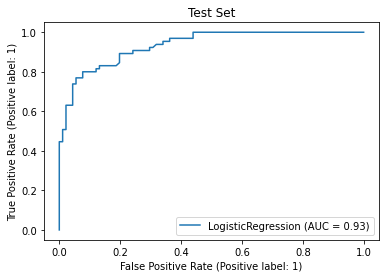

In [73]:
RocCurveDisplay.from_estimator(log, X_test, y_test)
plt.title("Test Set")
plt.show()

In [74]:
# Apply cross-validation using AUC score as the metric
cv_scores = cross_val_score(log, X_train, y_train, cv=5, scoring='roc_auc')

In [75]:
# Print the AUC scores for each fold
print("AUC scores for each fold: ", cv_scores)

AUC scores for each fold:  [0.94356121 0.95283519 0.93567568 0.95702703 0.95162162]


In [76]:
# Print the mean AUC score across all folds
print(f"Mean AUC score: {cv_scores.mean()}")

Mean AUC score: 0.9481441441441442


In [77]:
t=pd.DataFrame(log.predict_proba(X_train))
t.head()

0         1
0  0.902749  0.097251
1  0.999851  0.000149
2  0.496212  0.503788
3  0.038150  0.961850
4  0.999604  0.000396

In [78]:
# let's Create a Data Frame of Predictions and probabilities and Actual values :
prdctns=pd.DataFrame(y_train.index)
prdctns['Actual_values']=y_train.values
prdctns=pd.concat([prdctns,t[1]],axis=1)
prdctns['probs']=t[1]
prdctns.drop(1,axis=1,inplace=True)
prdctns['prdctns_deflt']=log.predict(X_train)
prdctns.head(10)

0  Actual_values     probs  prdctns_deflt
0  696              0  0.097251              0
1  640              0  0.000149              0
2  133              1  0.503788              1
3  355              1  0.961850              1
4   55              0  0.000396              0
5  409              0  0.268206              0
6  596              0  0.589297              1
7  367              1  0.665552              1
8  544              0  0.000507              0
9  356              1  0.892394              1

In [79]:
nos=[float(i)/10 for i in list(range(10))]
for i in nos:
    prdctns[i]=prdctns.probs.map(lambda x:0 if x<i else 1)
prdctns.head(10)

0  Actual_values     probs  prdctns_deflt  0.1  0.2  0.3  0.4  0.5  0.6   
0  1              0  0.097251              0    0    0    0    0    0    0  \
1  1              0  0.000149              0    0    0    0    0    0    0   
2  1              1  0.503788              1    1    1    1    1    1    0   
3  1              1  0.961850              1    1    1    1    1    1    1   
4  1              0  0.000396              0    0    0    0    0    0    0   
5  1              0  0.268206              0    1    1    0    0    0    0   
6  1              0  0.589297              1    1    1    1    1    1    0   
7  1              1  0.665552              1    1    1    1    1    1    1   
8  1              0  0.000507              0    0    0    0    0    0    0   
9  1              1  0.892394              1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    0    0    0  
5    0    0    0  
6    0    0    0  
7    0    0    0  
8    0    0    0  
9    1    1    0

In [80]:
nos=[i/10 for i in list(range(10))]
for i in nos :
    print("ROCAUC for",i, "cutoff for train set:",roc_auc_score(prdctns.Actual_values,prdctns[i]))

ROCAUC for 0.0 cutoff for train set: 0.5
ROCAUC for 0.1 cutoff for train set: 0.8103496353496353
ROCAUC for 0.2 cutoff for train set: 0.8558344058344058
ROCAUC for 0.3 cutoff for train set: 0.8810489060489061
ROCAUC for 0.4 cutoff for train set: 0.900139425139425
ROCAUC for 0.5 cutoff for train set: 0.9051694551694551
ROCAUC for 0.6 cutoff for train set: 0.8869369369369369
ROCAUC for 0.7 cutoff for train set: 0.8500429000429001
ROCAUC for 0.8 cutoff for train set: 0.8033140283140283
ROCAUC for 0.9 cutoff for train set: 0.7002252252252252


In [81]:
# Let's look at the optimum cutoff value based on the sensitivity and specificity tradeoff :
nos=[i/10 for i in range(10) ]
sensitivity=[]
specivicity=[]
Recall=[]
precision=[]
accuracy=[]
for i in nos :
    matrx=confusion_matrix(prdctns.Actual_values,prdctns[i])
    tn=matrx[0][0]
    tp=matrx[1][1]
    fp=matrx[0][1]
    fn=matrx[1][0]
    sensi=tp/(tp+fn)
    sensitivity.append(sensi)
    speci=tn/(tn+fp)
    specivicity.append(speci)
    prec=tp/(tp+fp)
    precision.append(prec)
    recal=tp/(tp+fn)
    Recall.append(recal)
    acc=(tp+tn)/(tp+tn+fp+fn)
    accuracy.append(acc)
cutoff=pd.DataFrame()
cutoff['cutoffs']=nos
cutoff['sensitivity']=sensitivity
cutoff['specivicity']=specivicity
cutoff['Recall']=Recall
cutoff['precision']=precision
cutoff['accuracy']=accuracy
cutoff

cutoffs  sensitivity  specivicity    Recall  precision  accuracy
0      0.0     1.000000     0.000000  1.000000   0.405145  0.405145
1      0.1     0.980159     0.640541  0.980159   0.650000  0.778135
2      0.2     0.960317     0.751351  0.960317   0.724551  0.836013
3      0.3     0.940476     0.821622  0.940476   0.782178  0.869775
4      0.4     0.924603     0.875676  0.924603   0.835125  0.895498
5      0.5     0.896825     0.913514  0.896825   0.875969  0.906752
6      0.6     0.833333     0.940541  0.833333   0.905172  0.897106
7      0.7     0.746032     0.954054  0.746032   0.917073  0.869775
8      0.8     0.630952     0.975676  0.630952   0.946429  0.836013
9      0.9     0.416667     0.983784  0.416667   0.945946  0.754019

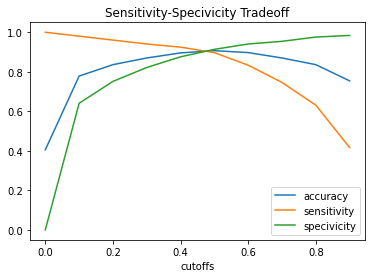

In [82]:
cutoff.plot.line(x='cutoffs', y=['accuracy','sensitivity','specivicity'])
plt.title("Sensitivity-Specivicity Tradeoff")
plt.show()

By observing the Graph above the Sensitivity-Specivicity cutoff is approx 0.5